<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/6_Evaluation_of_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,classification_report,precision_recall_curve,auc,roc_curve,precision_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
np.set_printoptions(precision=2)

## Evaluation for classification

### Binary classification

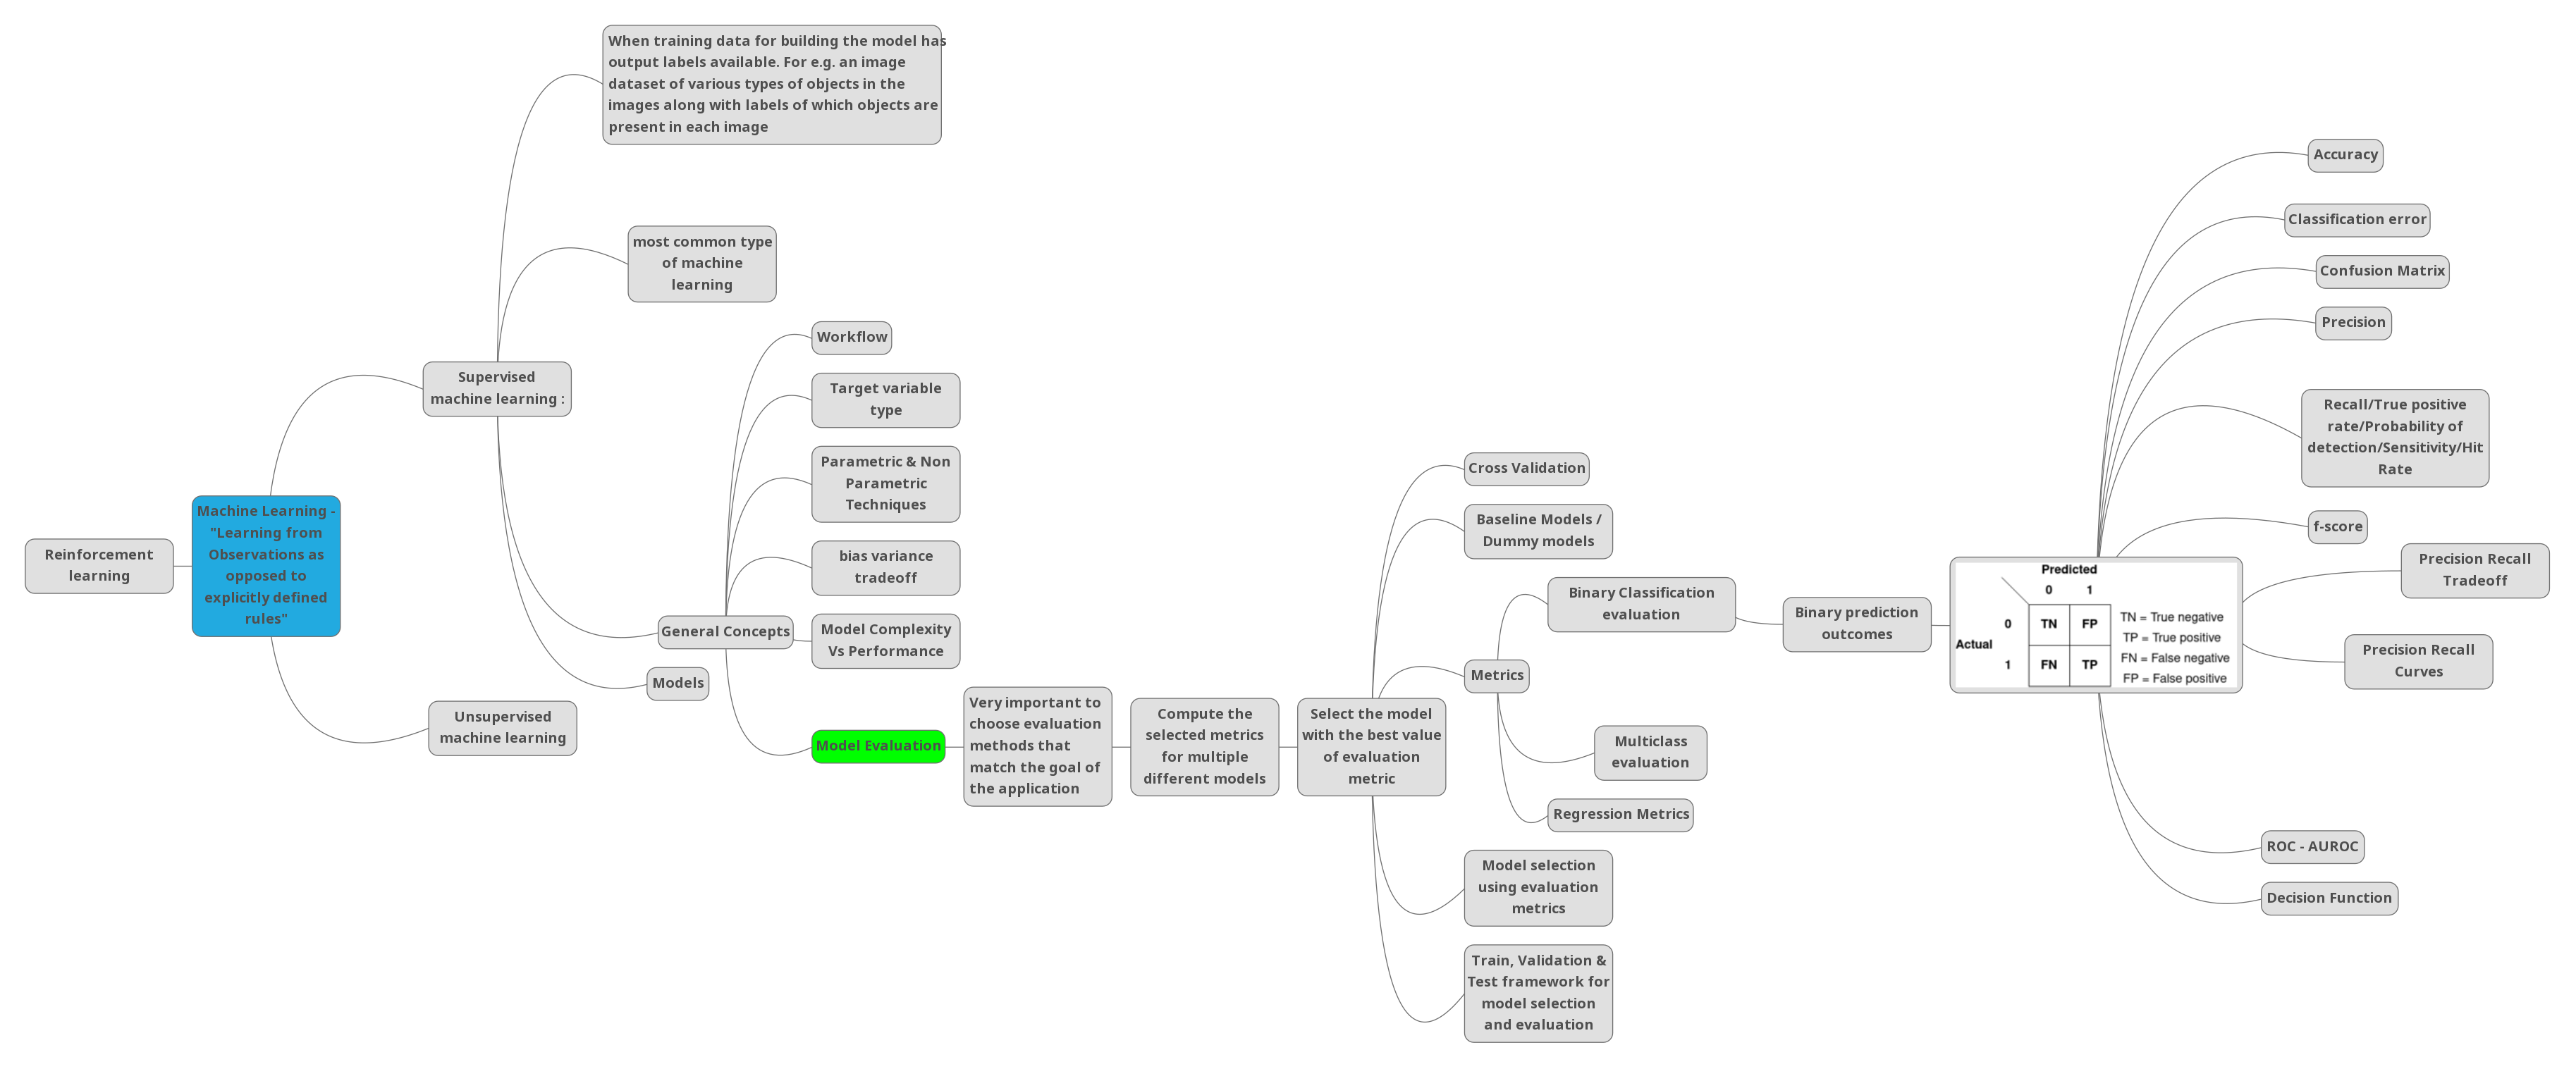

#### Baseline model

We create a baseline model and compare the subsequent models' performance against the simple baseline model. 

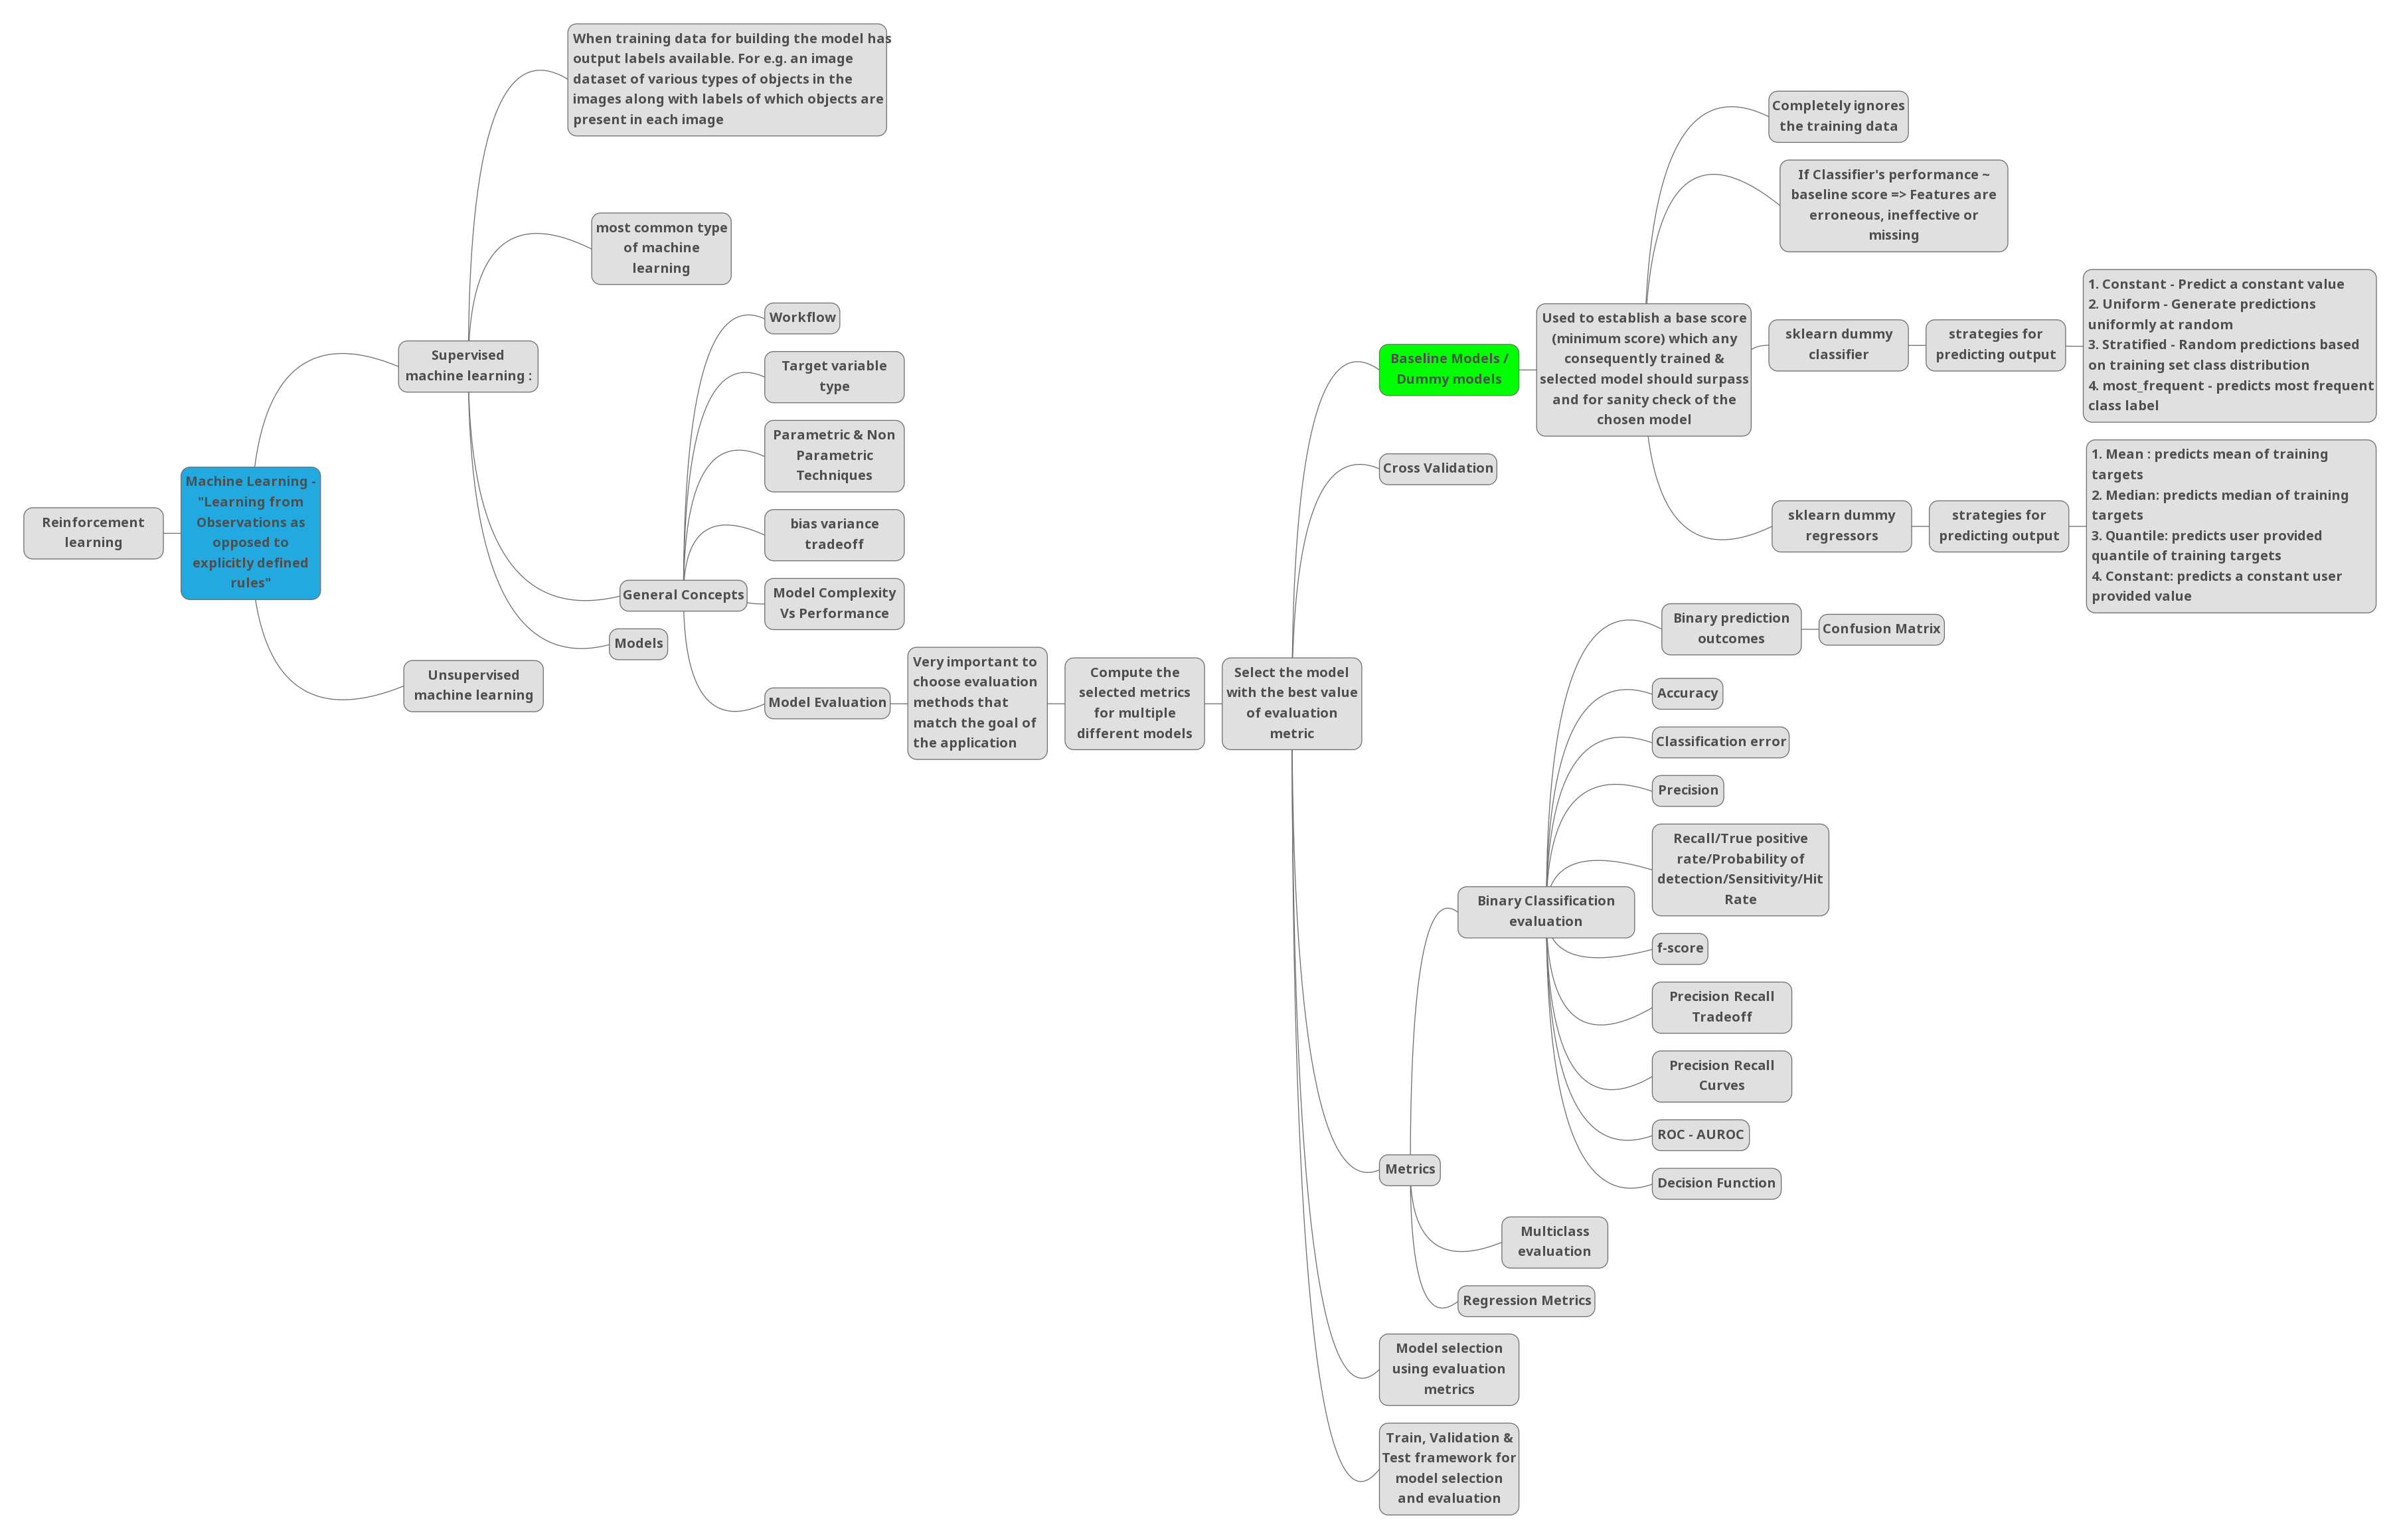

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
DigitsData = load_digits()

In [ ]:
print(DigitsData.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
X_digits,y_digits = DigitsData.data,DigitsData.target

In [ ]:
for X in  (list(zip(np.unique(y_digits),np.bincount(y_digits)))):
  print (X)

(0, 178)
(1, 182)
(2, 177)
(3, 183)
(4, 181)
(5, 182)
(6, 181)
(7, 179)
(8, 174)
(9, 180)


* Generate imbalanced dataset 

In [ ]:
y_digits_imbalanced = y_digits.copy()

In [ ]:
y_digits_imbalanced[y_digits_imbalanced != 1] = 0

In [ ]:
for X in zip(np.unique(y_digits_imbalanced),np.bincount(y_digits_imbalanced)):
  print(X)

(0, 1615)
(1, 182)


In [ ]:
print("Old labels")
print(y_digits[1:20])
print("New labels")
print(y_digits_imbalanced[1:20])

Old labels
[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New labels
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits_imbalanced,random_state = 0)

* SVM 

In [ ]:
SVM_digits = SVC()

In [ ]:
SVM_digits.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Accuracy of SVM on digits dataset (test set) = {:.2f}".format(SVM_digits.score(X_test,y_test)))


Accuracy of SVM on digits dataset (test set) = 1.00


* Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummyclfdigits = DummyClassifier(strategy='most_frequent')

In [ ]:
dummyclfdigits.fit(X_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [ ]:
print("Accuracy of Dummy Classifier on digits dataset (test set) = {:.2f}".format(dummyclfdigits.score(X_test,y_test)))


Accuracy of Dummy Classifier on digits dataset (test set) = 0.90


* SVM(Linear kernel)

In [ ]:
SVMlin_digits = SVC(kernel = 'linear')

In [ ]:
SVMlin_digits.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Accuracy of SVM (Linear Kernel) on digits dataset (test set) = {:.2f}".format(SVMlin_digits.score(X_test,y_test)))


Accuracy of SVM (Linear Kernel) on digits dataset (test set) = 0.98


#### Confusion matrix

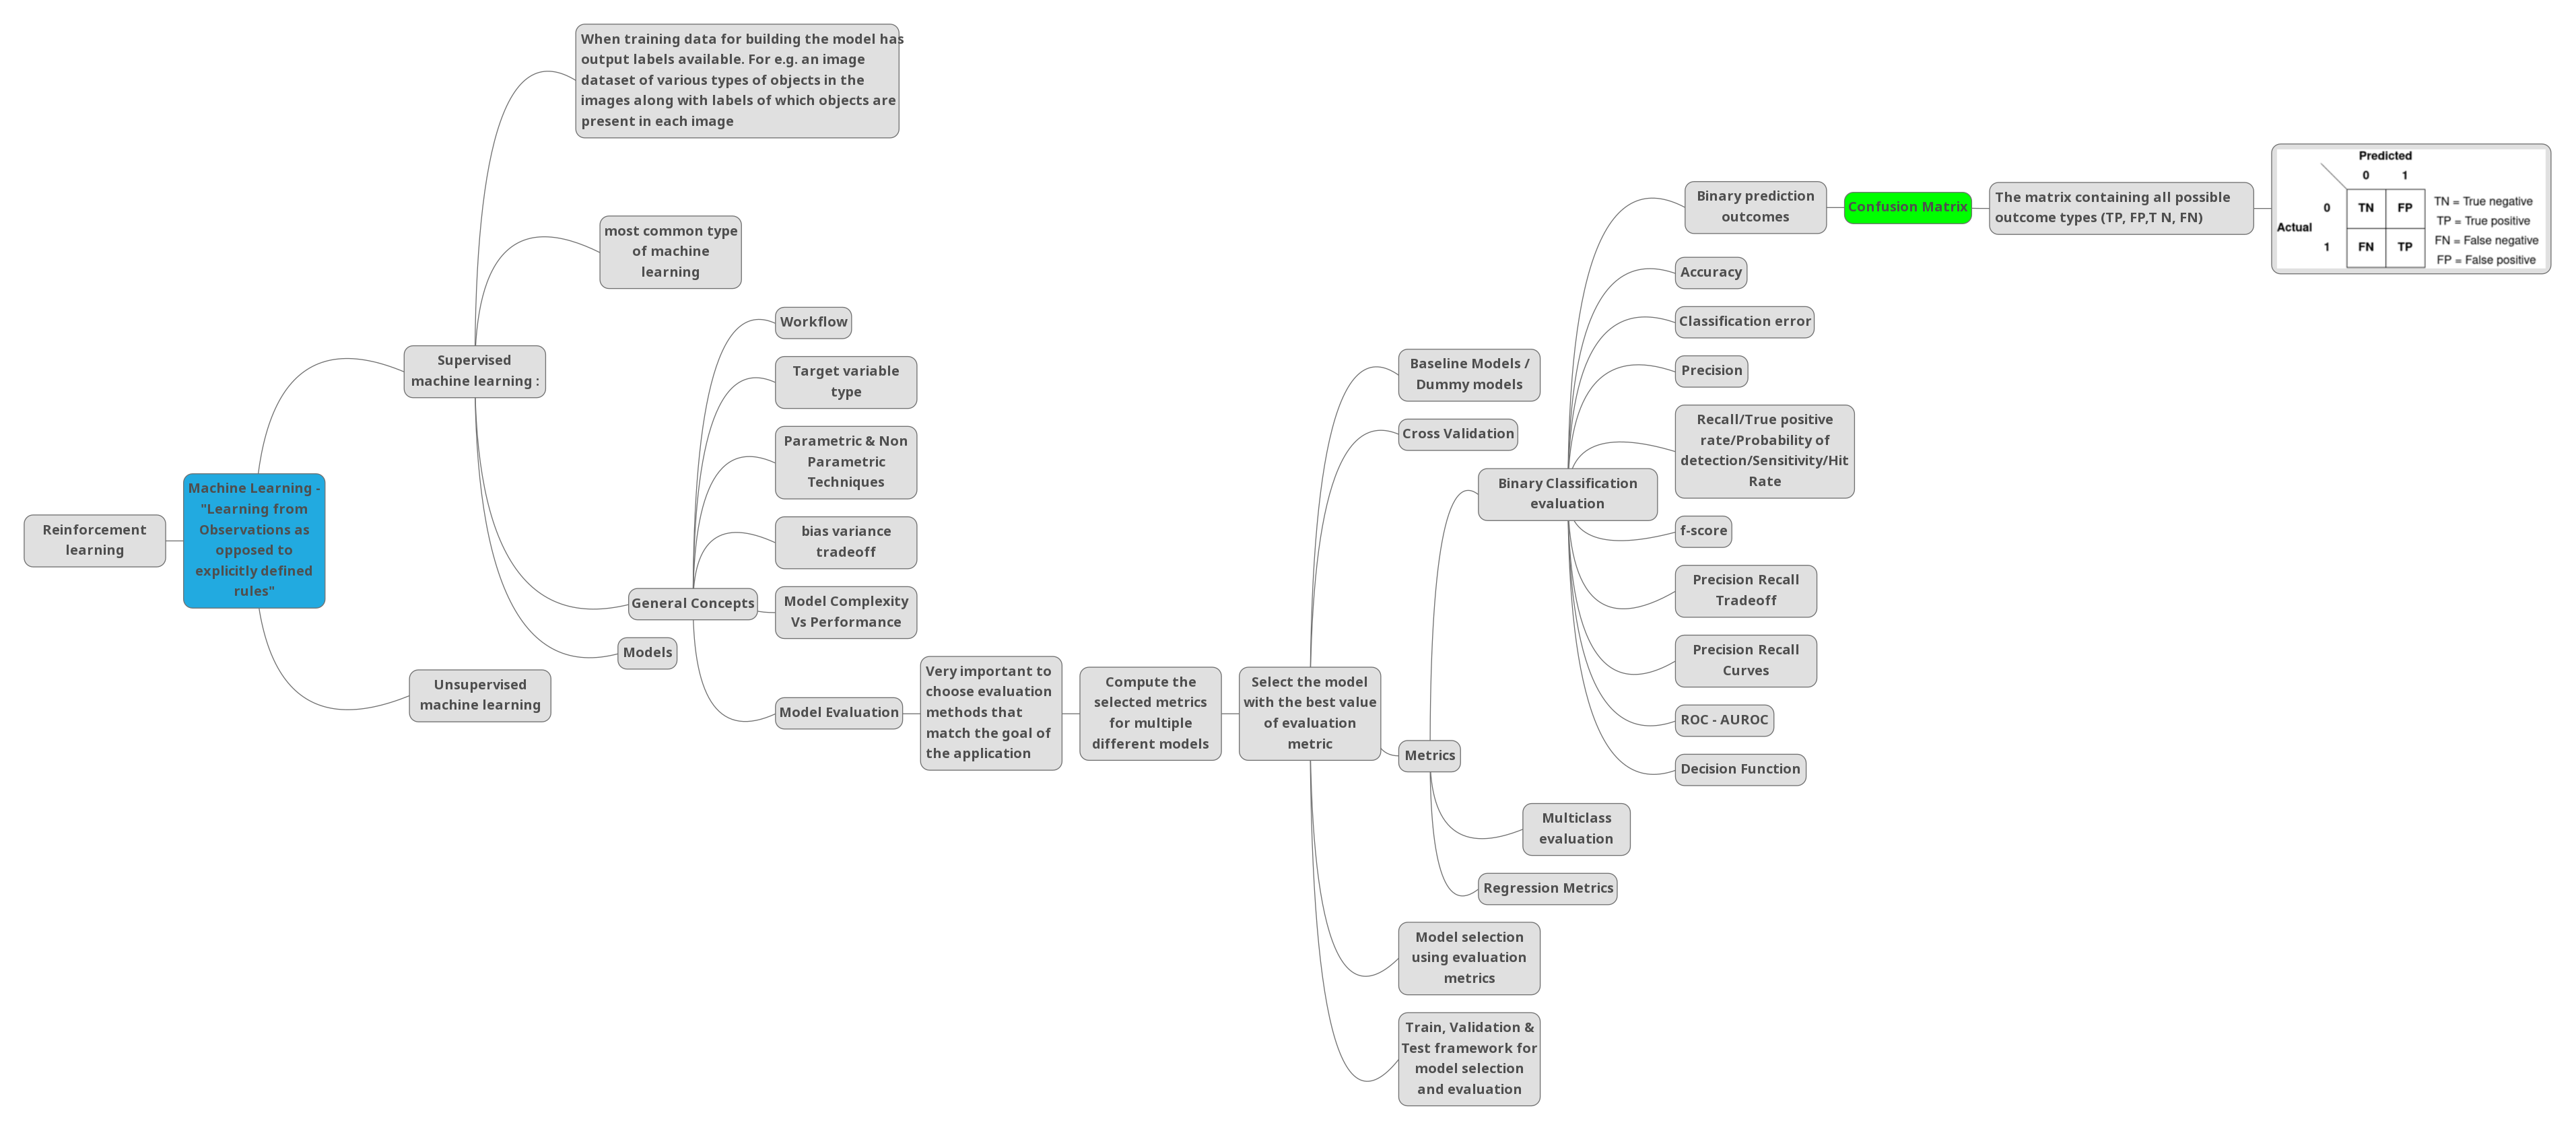

In [ ]:
print("Confusion Matrix: Dummy Classifier - Majority Class Strategy")
confusion_matrix(y_test,dummyclfdigits.predict(X_test))

Confusion Matrix: Dummy Classifier - Majority Class Strategy


array([[407,   0],
       [ 43,   0]])

In [ ]:
dummyclfdigits2 = DummyClassifier(strategy='stratified').fit(X_train,y_train)

In [ ]:
print("Confusion Matrix: Dummy Classifier - Stratified Strategy")
confusion_matrix(y_test,dummyclfdigits2.predict(X_test))

Confusion Matrix: Dummy Classifier - Stratified Strategy


array([[366,  41],
       [ 41,   2]])

In [ ]:
#roughly 10% which is the distribution of the classes in the training dataset 

In [ ]:
print("Confusion Matrix: SVM (Radial Kernel)")
confusion_matrix(y_test,SVM_digits.predict(X_test))

Confusion Matrix: SVM (Radial Kernel)


array([[407,   0],
       [  2,  41]])

In [ ]:
print("Confusion Matrix: SVM (Linear Kernel)")
confusion_matrix(y_test,SVMlin_digits.predict(X_test))

Confusion Matrix: SVM (Linear Kernel)


array([[402,   5],
       [  5,  38]])

* Logistic Regression 

In [ ]:
LogRegDigits = LogisticRegression(max_iter=900).fit(X_train,y_train)
print("Confusion Matrix: Logistic Regression (max_iter = 700)")
confusion_matrix(y_test,LogRegDigits.predict(X_test))

Confusion Matrix: Logistic Regression (max_iter = 700)


array([[403,   4],
       [  7,  36]])

* Decision Tree 

In [ ]:
DTDigits = DecisionTreeClassifier().fit(X_train,y_train)
print("Confusion Matrix: Decision Tree (default) on digits")
confusion_matrix(y_test,DTDigits.predict(X_test))

Confusion Matrix: Decision Tree (default) on digits


array([[400,   7],
       [  8,  35]])

In [ ]:
DTDigits.tree_.max_depth

7

In [ ]:
DTDigits = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
print("Confusion Matrix: Decision Tree (max_depth = 2) on digits")
confusion_matrix(y_test,DTDigits.predict(X_test))

Confusion Matrix: Decision Tree (max_depth = 2) on digits


array([[400,   7],
       [ 17,  26]])

#### Accuracy

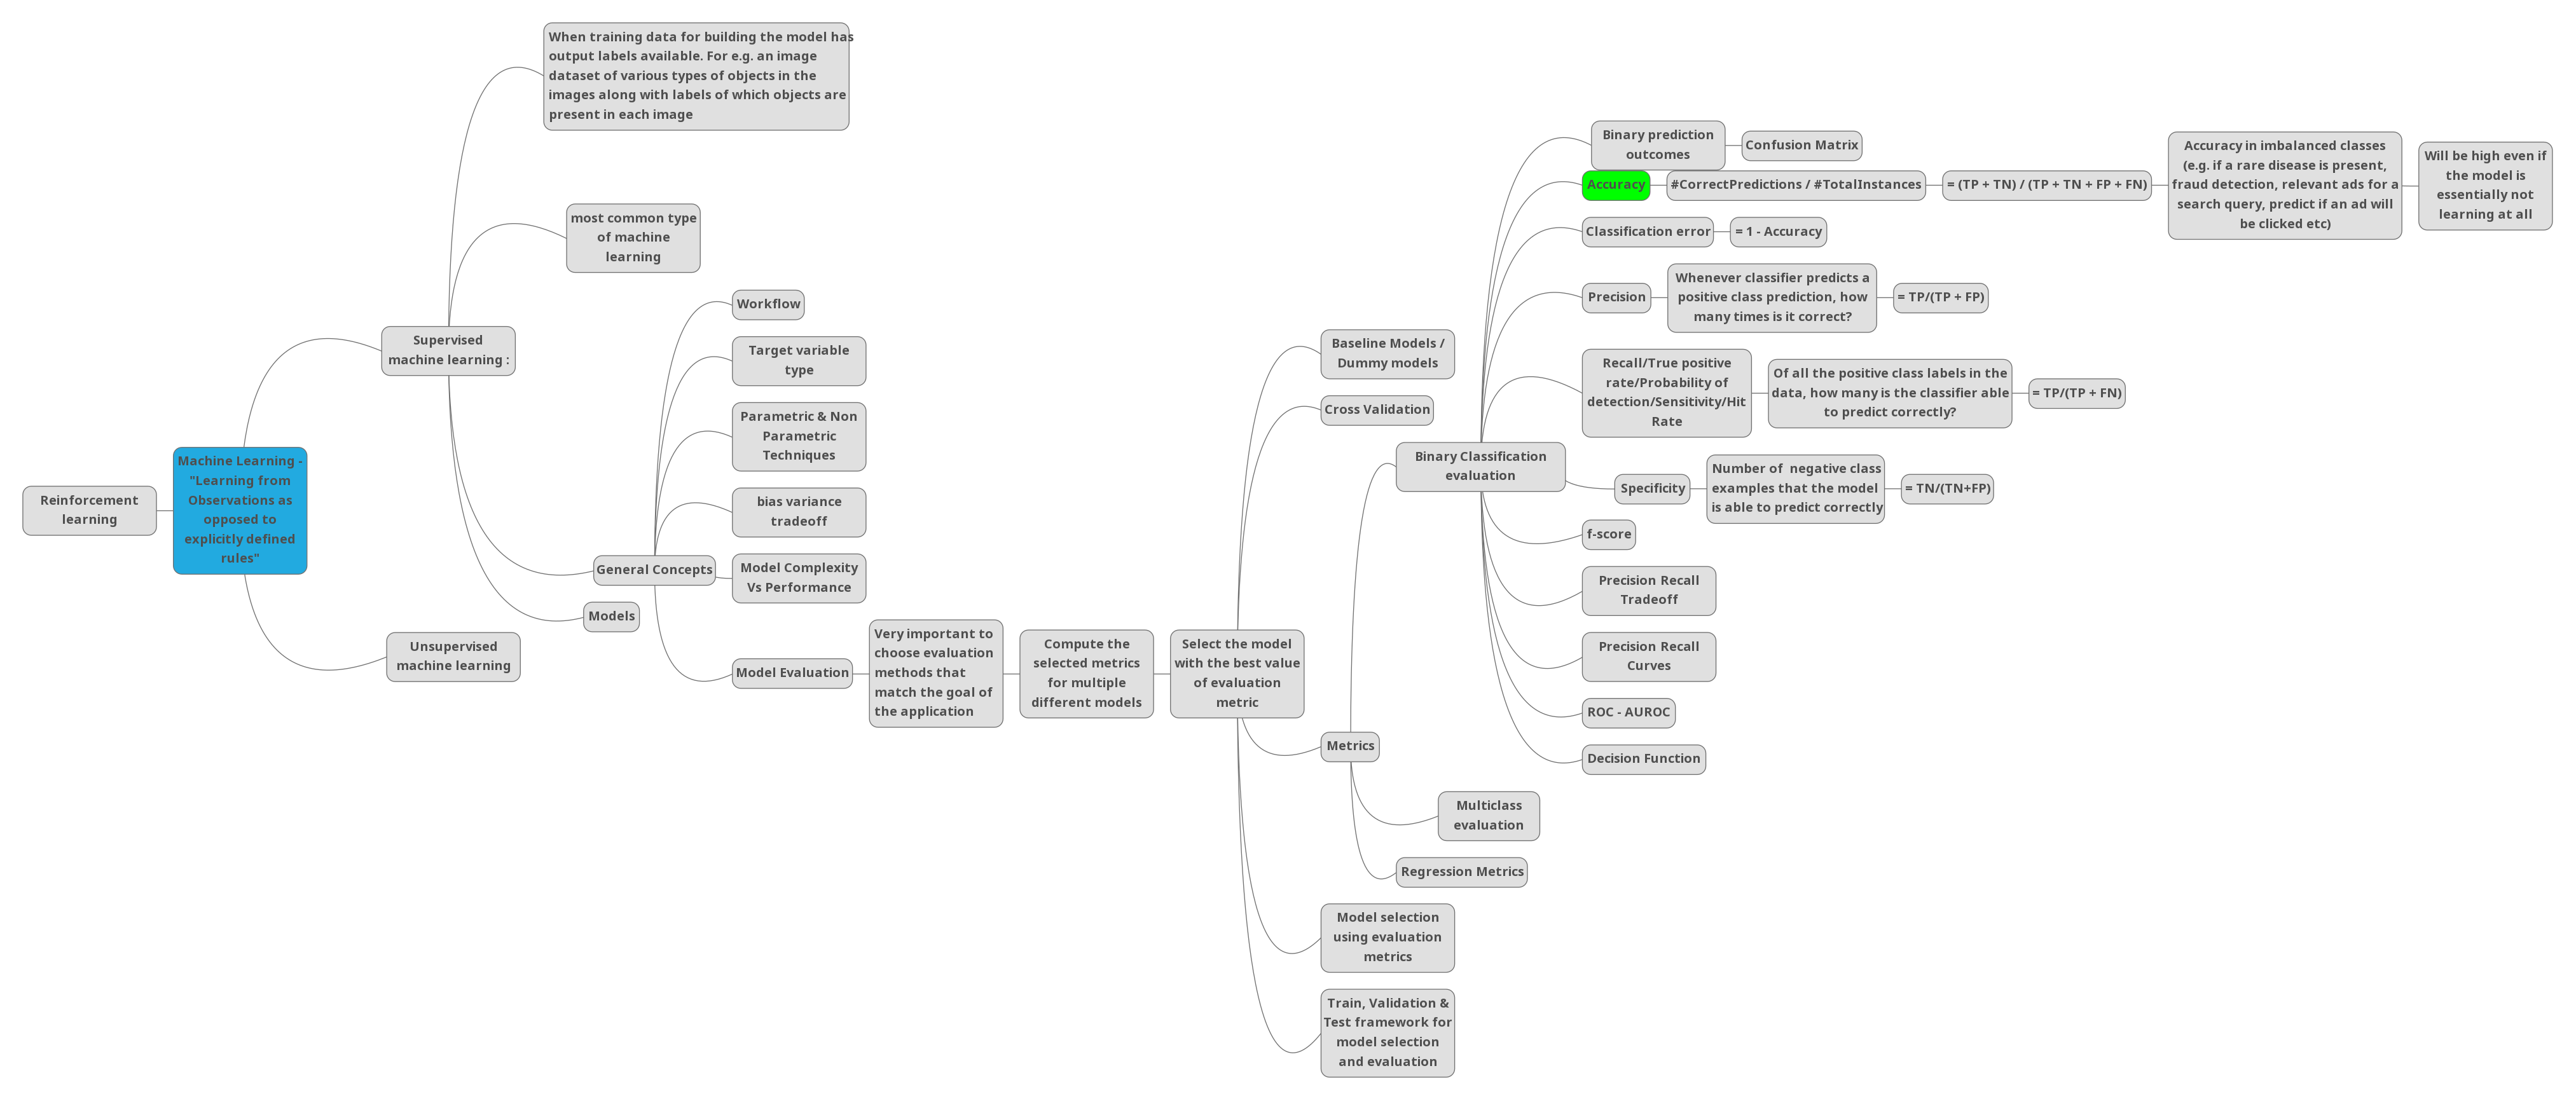

#### f1-score

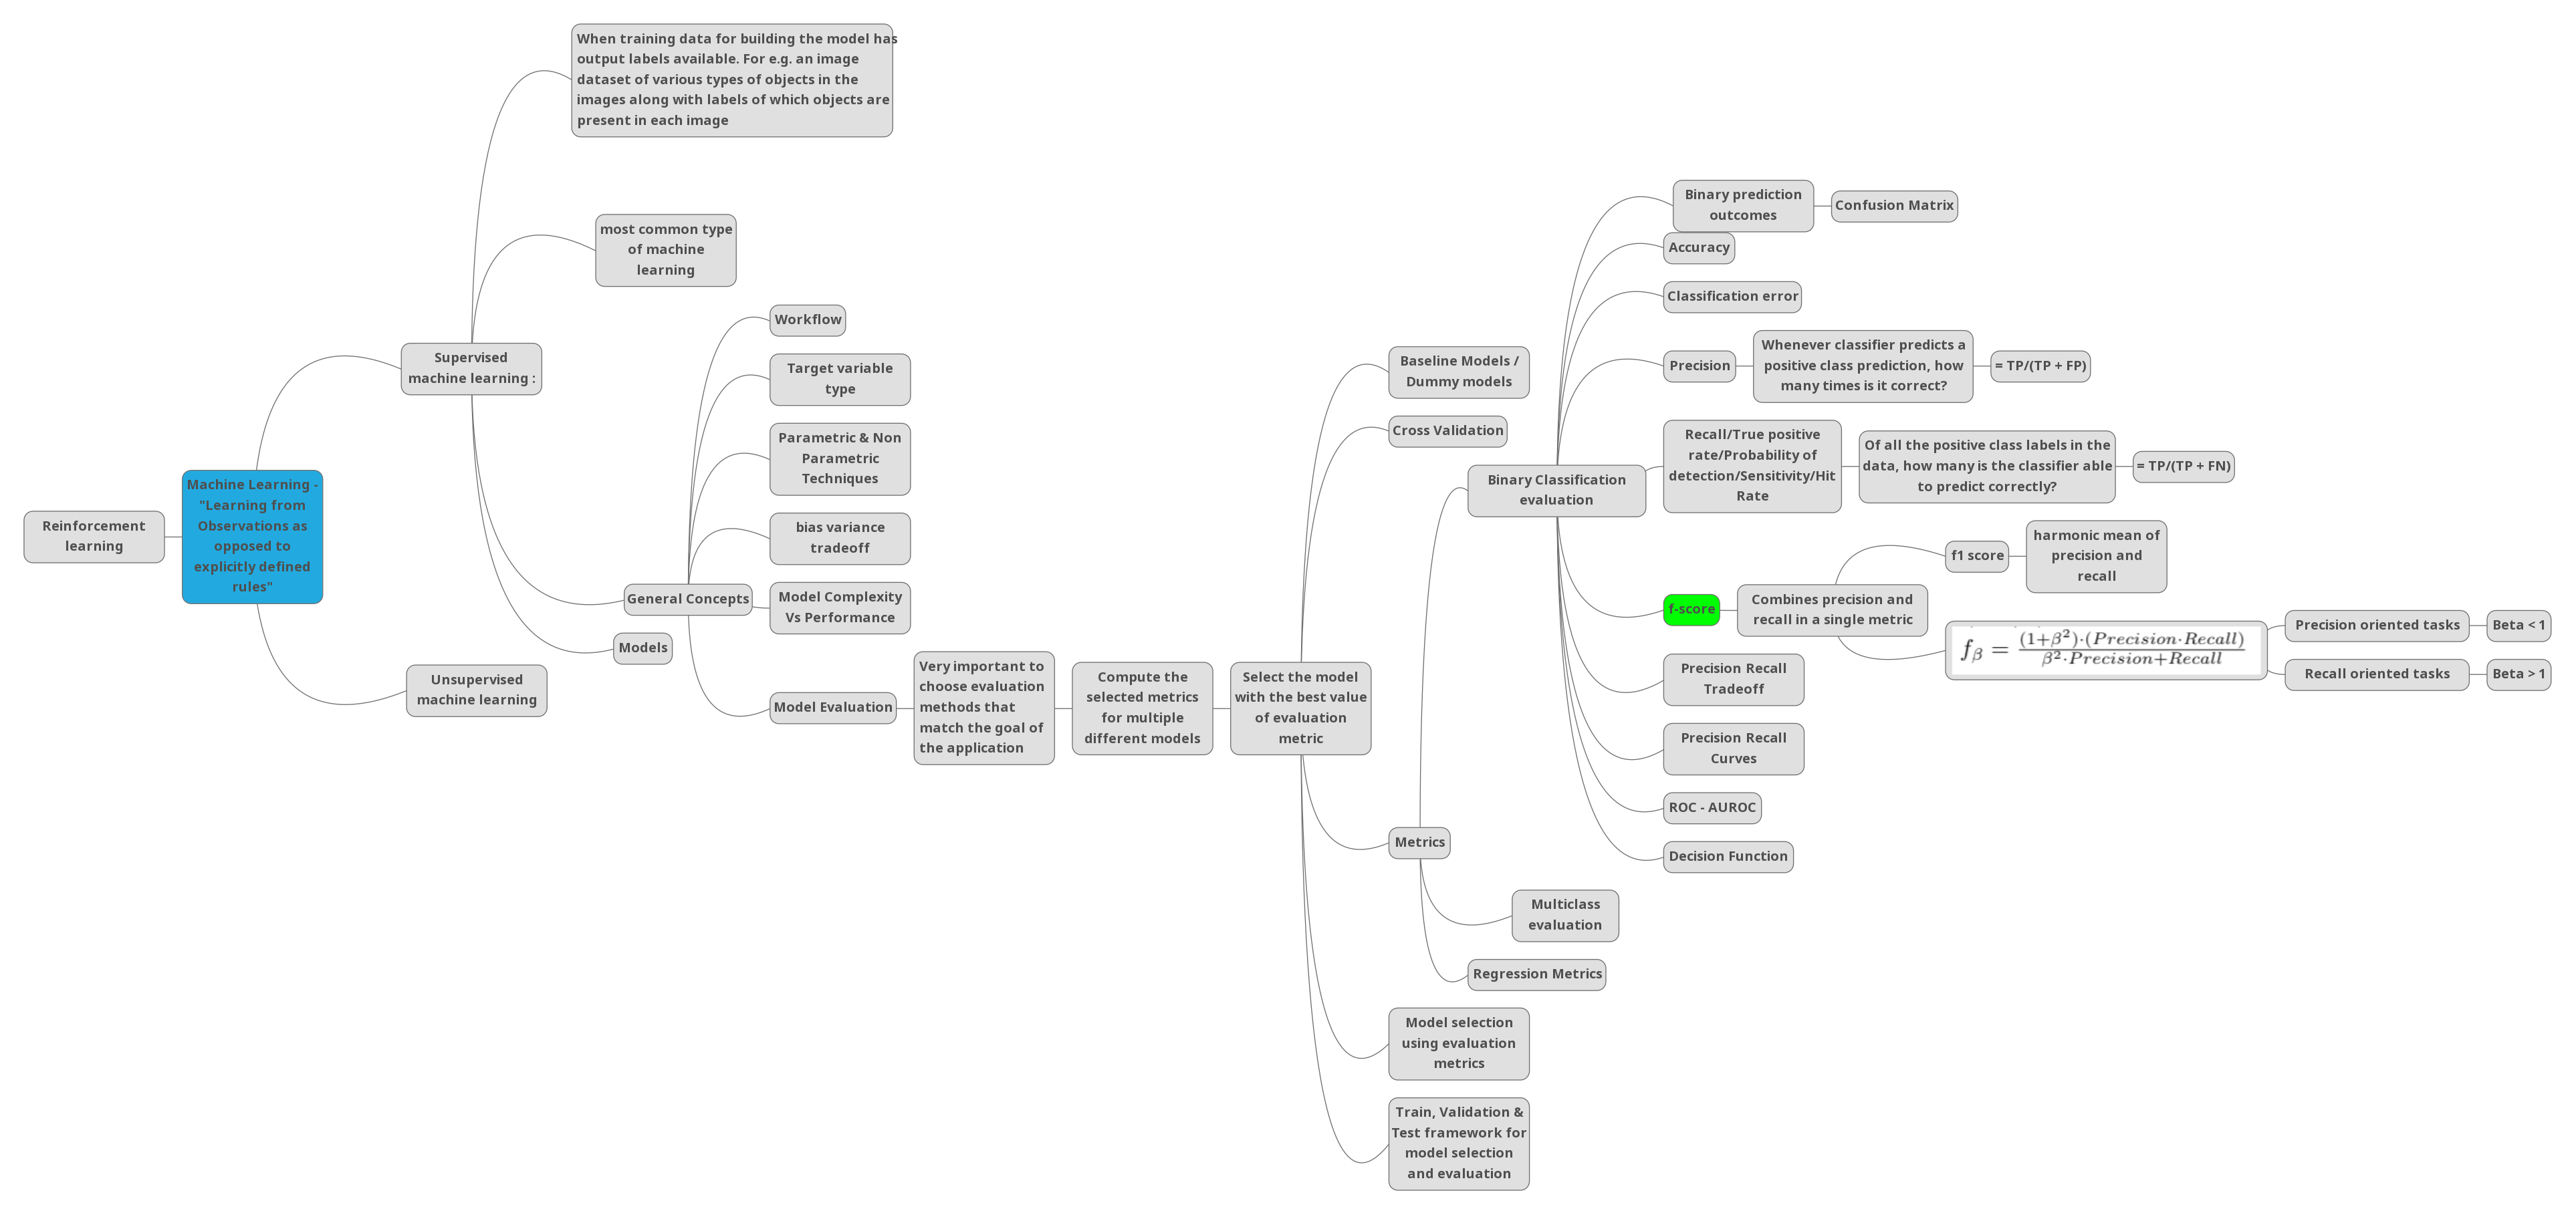

In [ ]:
print("f1 score")
print("Dummy Classifier (Most Frequent class) = {:.2f}".format(f1_score(y_test,dummyclfdigits.predict(X_test))))
print("Dummy Classifier (Stratified Strategy) = {:.2f}".format(f1_score(y_test,dummyclfdigits2.predict(X_test))))
print("SVM RBF kernel = {:.2f}".format(f1_score(y_test,SVM_digits.predict(X_test))))
print("SVM Linear kernel = {:.2f}".format(f1_score(y_test,SVMlin_digits.predict(X_test))))
print("Logistic Regression = {:.2f}".format(f1_score(y_test,LogRegDigits.predict(X_test))))
print("Decision Tree = {:.2f}".format(f1_score(y_test,DTDigits.predict(X_test))))


f1 score
Dummy Classifier (Most Frequent class) = 0.00
Dummy Classifier (Stratified Strategy) = 0.07
SVM RBF kernel = 0.98
SVM Linear kernel = 0.88
Logistic Regression = 0.87
Decision Tree = 0.68


* Best classifier: (Metric = f1_score)
  1. SVM(Radial)
  2. SVM (Linear)
  3. Logistic Regression
  4. Decision Tree

* Precision, Accuracy, Recall, f1-score

In [ ]:
print("Classification Report ")
print("Dummy Classifier - Most Frequent class Strategy")
print(classification_report(y_test,dummyclfdigits.predict(X_test),target_names=['not 1','1']))
print("Dummy Classifier - Stratified Strategy")
print(classification_report(y_test,dummyclfdigits2.predict(X_test),target_names=['not 1','1']))
print("SVM RBF kernel")
print(classification_report(y_test,SVM_digits.predict(X_test),target_names=['not 1','1']))
print("SVM Linear kernel")
print(classification_report(y_test,SVMlin_digits.predict(X_test),target_names=['not 1','1']))
print("Logistic Regression")
print(classification_report(y_test,LogRegDigits.predict(X_test),target_names=['not 1','1']))
print("Decision Tree")
print(classification_report(y_test,DTDigits.predict(X_test),target_names=['not 1','1']))

Classification Report 
Dummy Classifier - Most Frequent class Strategy
              precision    recall  f1-score   support

       not 1       0.90      1.00      0.95       407
           1       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450

Dummy Classifier - Stratified Strategy
              precision    recall  f1-score   support

       not 1       0.91      0.91      0.91       407
           1       0.10      0.09      0.10        43

    accuracy                           0.84       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.83      0.84      0.83       450

SVM RBF kernel
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00       407
           1       1.00      0.95      0.98        43

    accuracy                           1.00       450
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Function

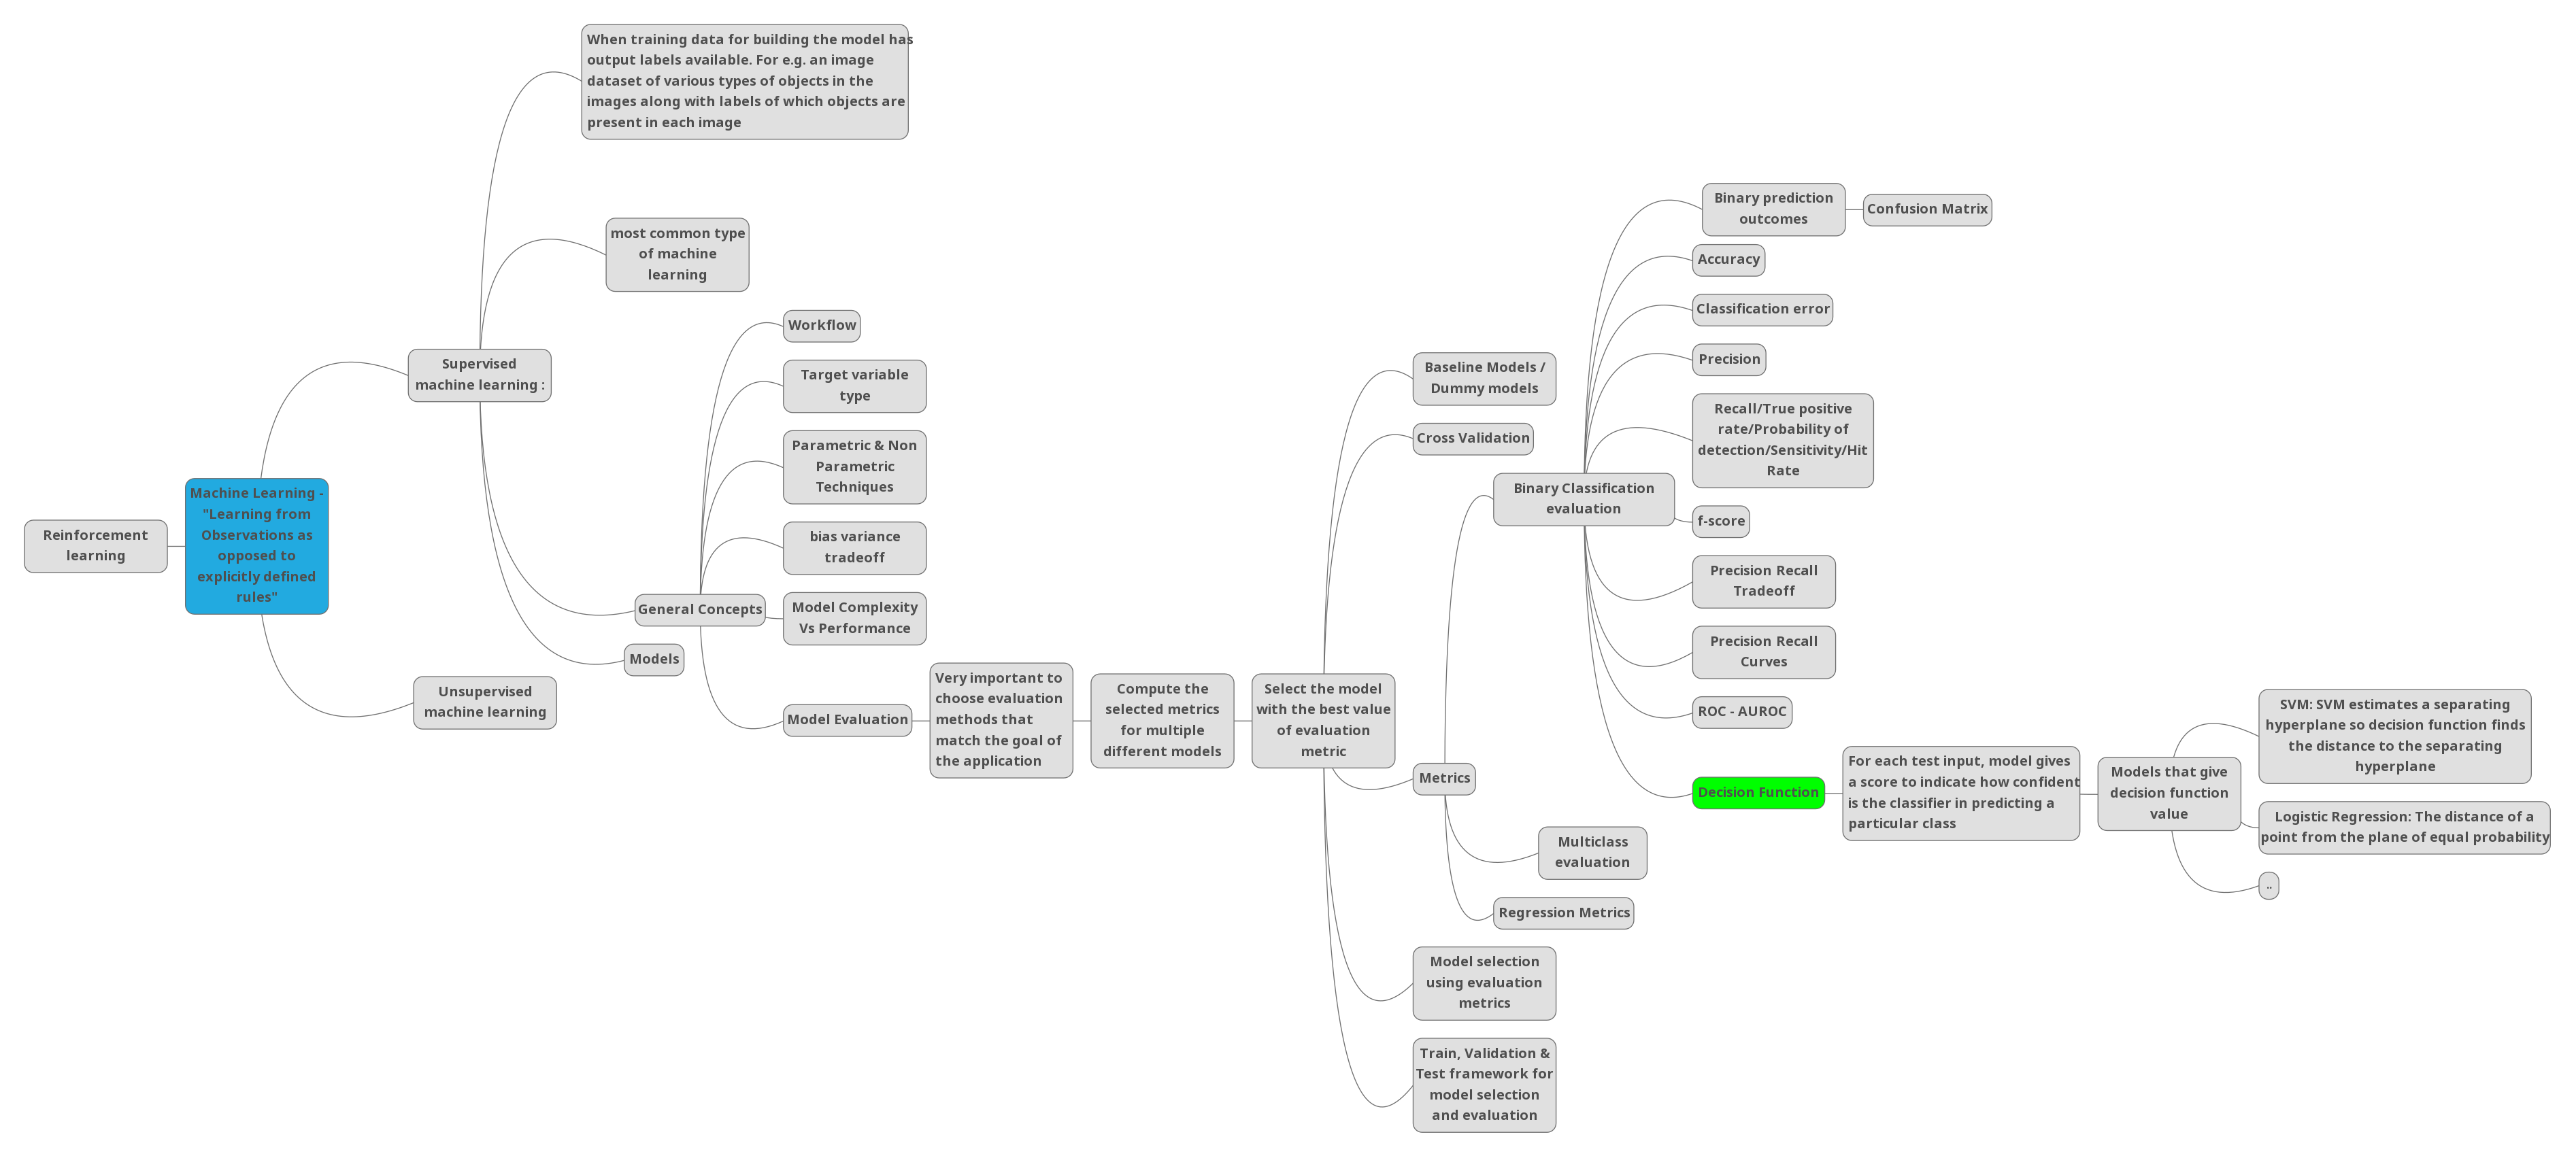

In [ ]:
DecFnLogRegDigits = LogRegDigits.decision_function(X_test)

In [ ]:
for x in (list(zip(y_test[0:20],DecFnLogRegDigits[0:20]))):
  print (x)

(0, -34.62965251715387)
(0, -18.00710189145109)
(0, -20.988652510884364)
(0, -36.81475273707072)
(0, -39.34052770966422)
(0, -18.86401210271846)
(1, 6.00209778367665)
(0, -32.728067269954025)
(0, -35.48770649439418)
(0, -37.35612652392992)
(0, -25.031654624437433)
(0, -21.402724114279327)
(0, -36.510711972661504)
(0, -15.923500682245841)
(0, -12.840715945923545)
(0, -13.727416129759074)
(1, 14.769298407410023)
(0, -39.40761878266293)
(0, -26.109597780480243)
(0, -28.43756047452812)


#### Predict Probabilities

Difference between predict, predict_proba and decision_function ([Source: Stack Exchange](https://stats.stackexchange.com/questions/329857/what-is-the-difference-between-decision-function-predict-proba-and-predict-fun))



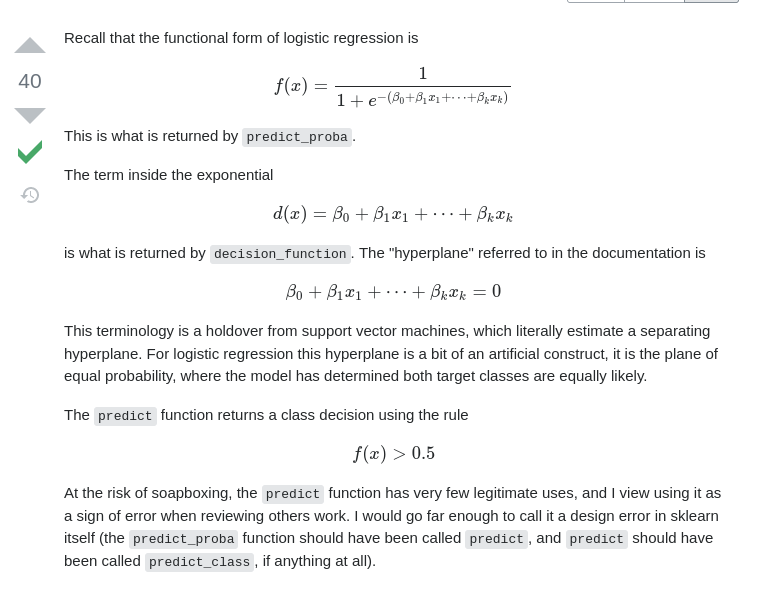

In [ ]:
PredProbLogRegDigits = LogRegDigits.predict_proba(X_test)

In [ ]:
for x in (list(zip(y_test[0:20],PredProbLogRegDigits[0:20][:,1]))):
  print (x)

(0, 9.131308204909588e-16)
(0, 1.512220102166667e-08)
(0, 7.669093481894798e-10)
(0, 1.0269659245898714e-16)
(0, 8.215346784973234e-18)
(0, 6.418944703630233e-09)
(1, 0.9975325456496914)
(0, 6.114782039708659e-15)
(0, 3.8715501930294285e-16)
(0, 5.97641002227618e-17)
(0, 1.3455211343365045e-11)
(0, 5.068915123671552e-10)
(0, 1.3918718769334918e-16)
(0, 1.2148186996103043e-07)
(0, 2.6506157232919956e-06)
(0, 1.0920900487132936e-06)
(1, 0.9999996147212707)
(0, 7.682253212927166e-18)
(0, 4.578737638915673e-12)
(0, 4.4640022735828206e-13)


* TODO: Which functions give predict_probability and decision_function output? 

#### Precision Recall Curves

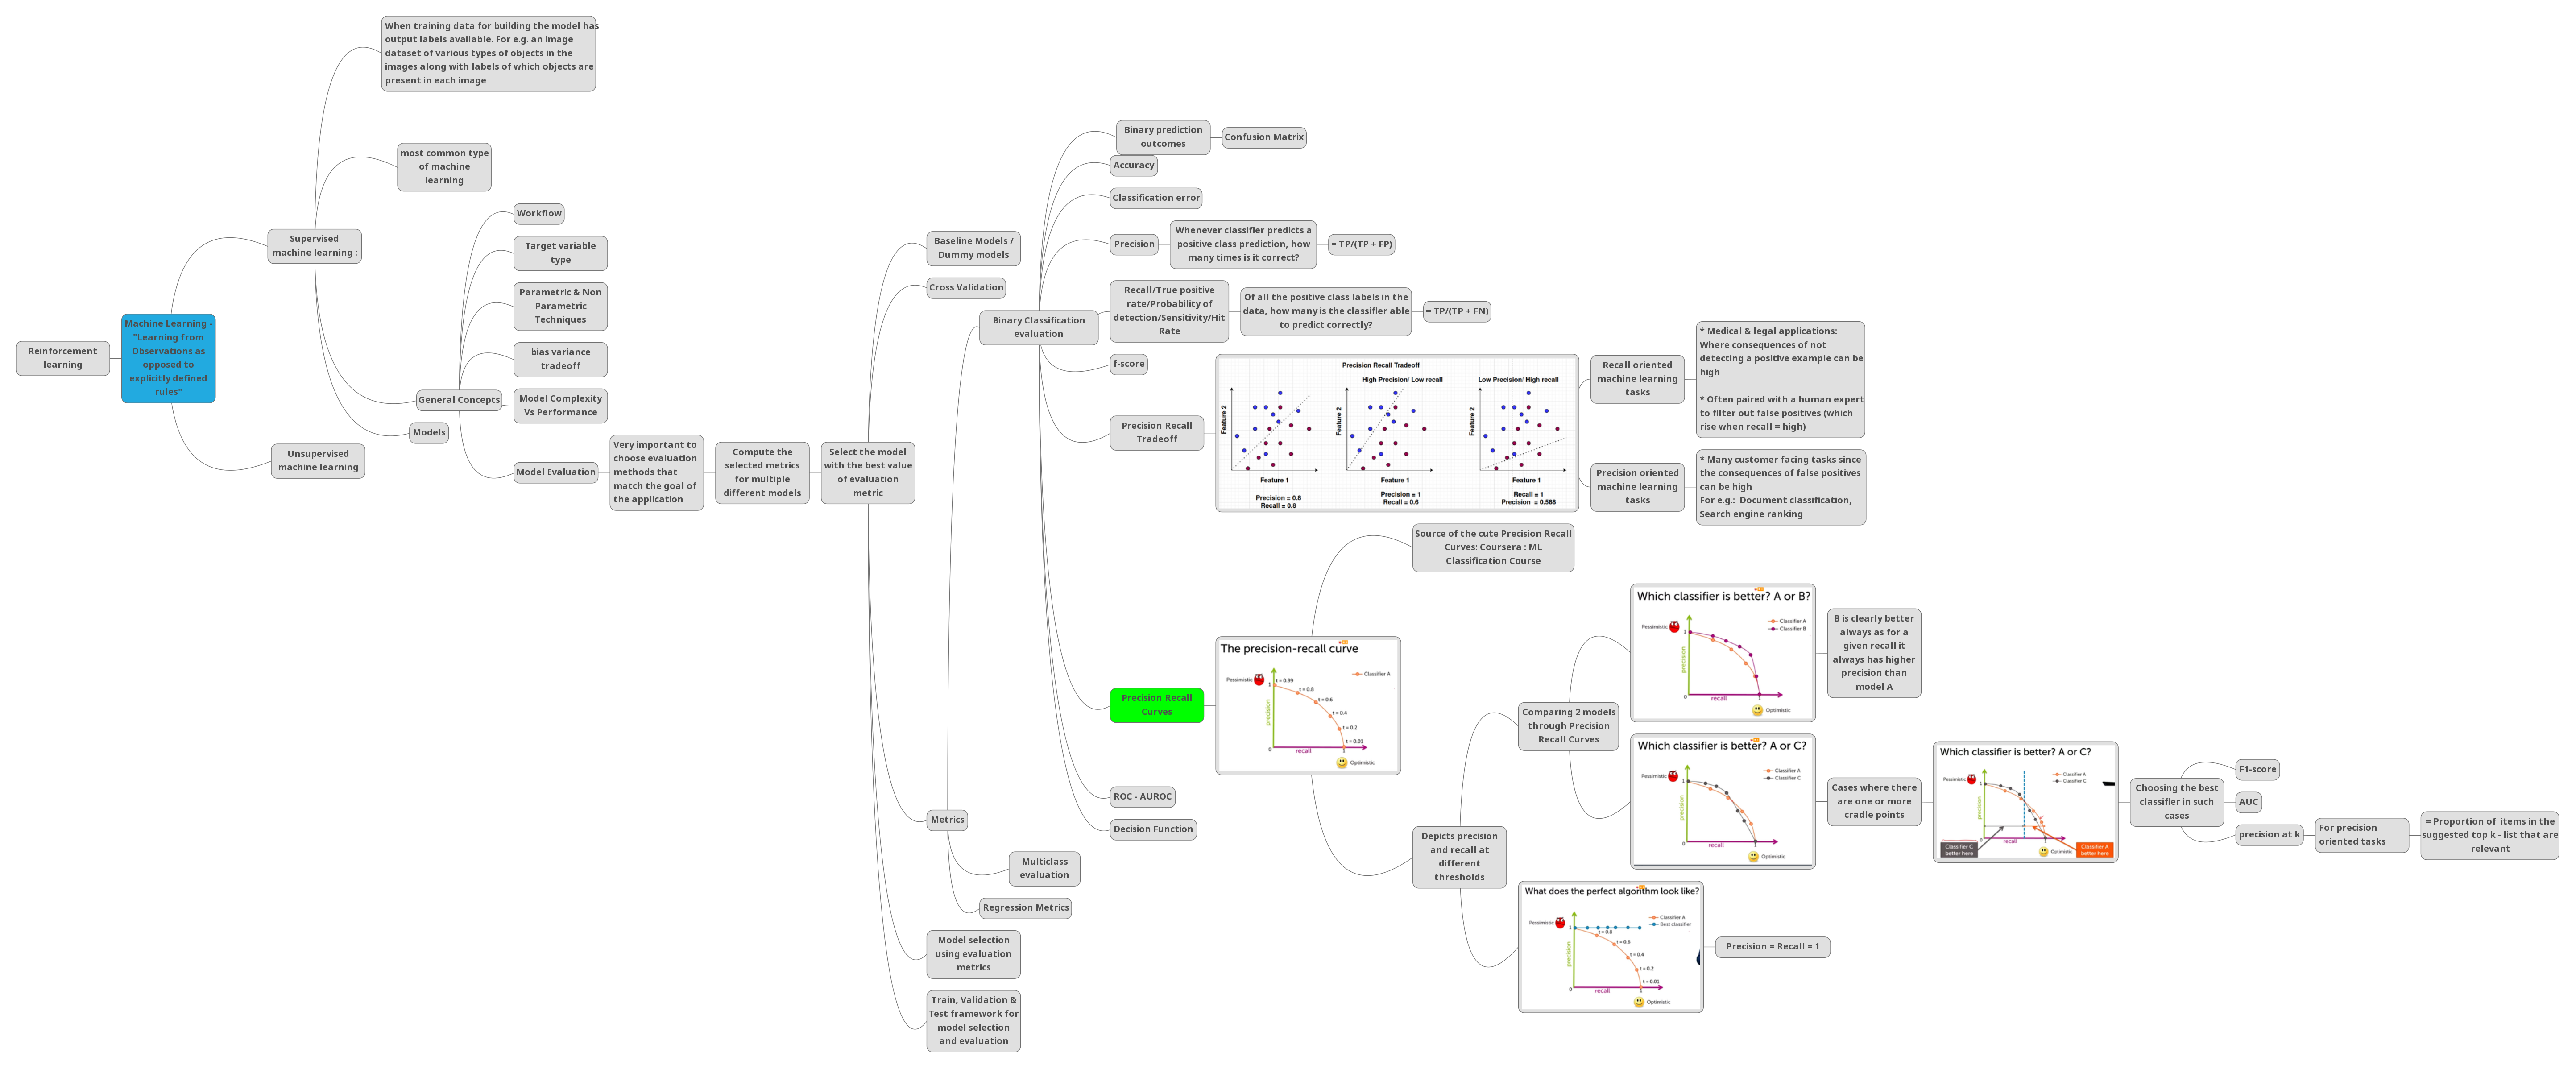

In [ ]:
precision,recall,thresholds = precision_recall_curve(y_test,PredProbLogRegDigits[:,1])

In [ ]:
f1score = (2 * precision * recall)/(precision + recall)
best_thres = np.argmax(f1score)

In [ ]:
best_thres

23

In [ ]:
thresholds[best_thres]

0.46508381518355374

Text(0.5, 1.0, 'Precision Recall Curve of Logistic Regression \n model on imbalanced digits data')

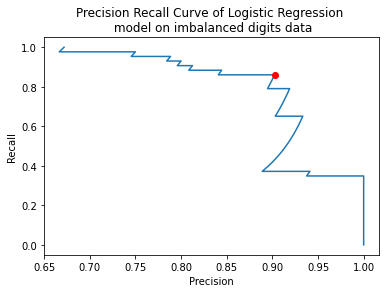

In [ ]:
plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.plot(precision[best_thres],recall[best_thres],'ro')
plt.title('Precision Recall Curve of Logistic Regression \n model on imbalanced digits data')

* todo: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

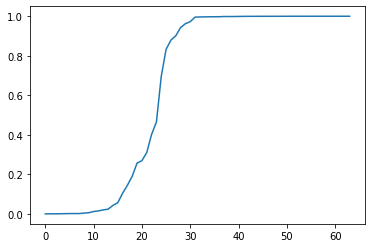

In [ ]:
plt.plot(thresholds)

#### ROC Curves (AU-ROC / AUC)

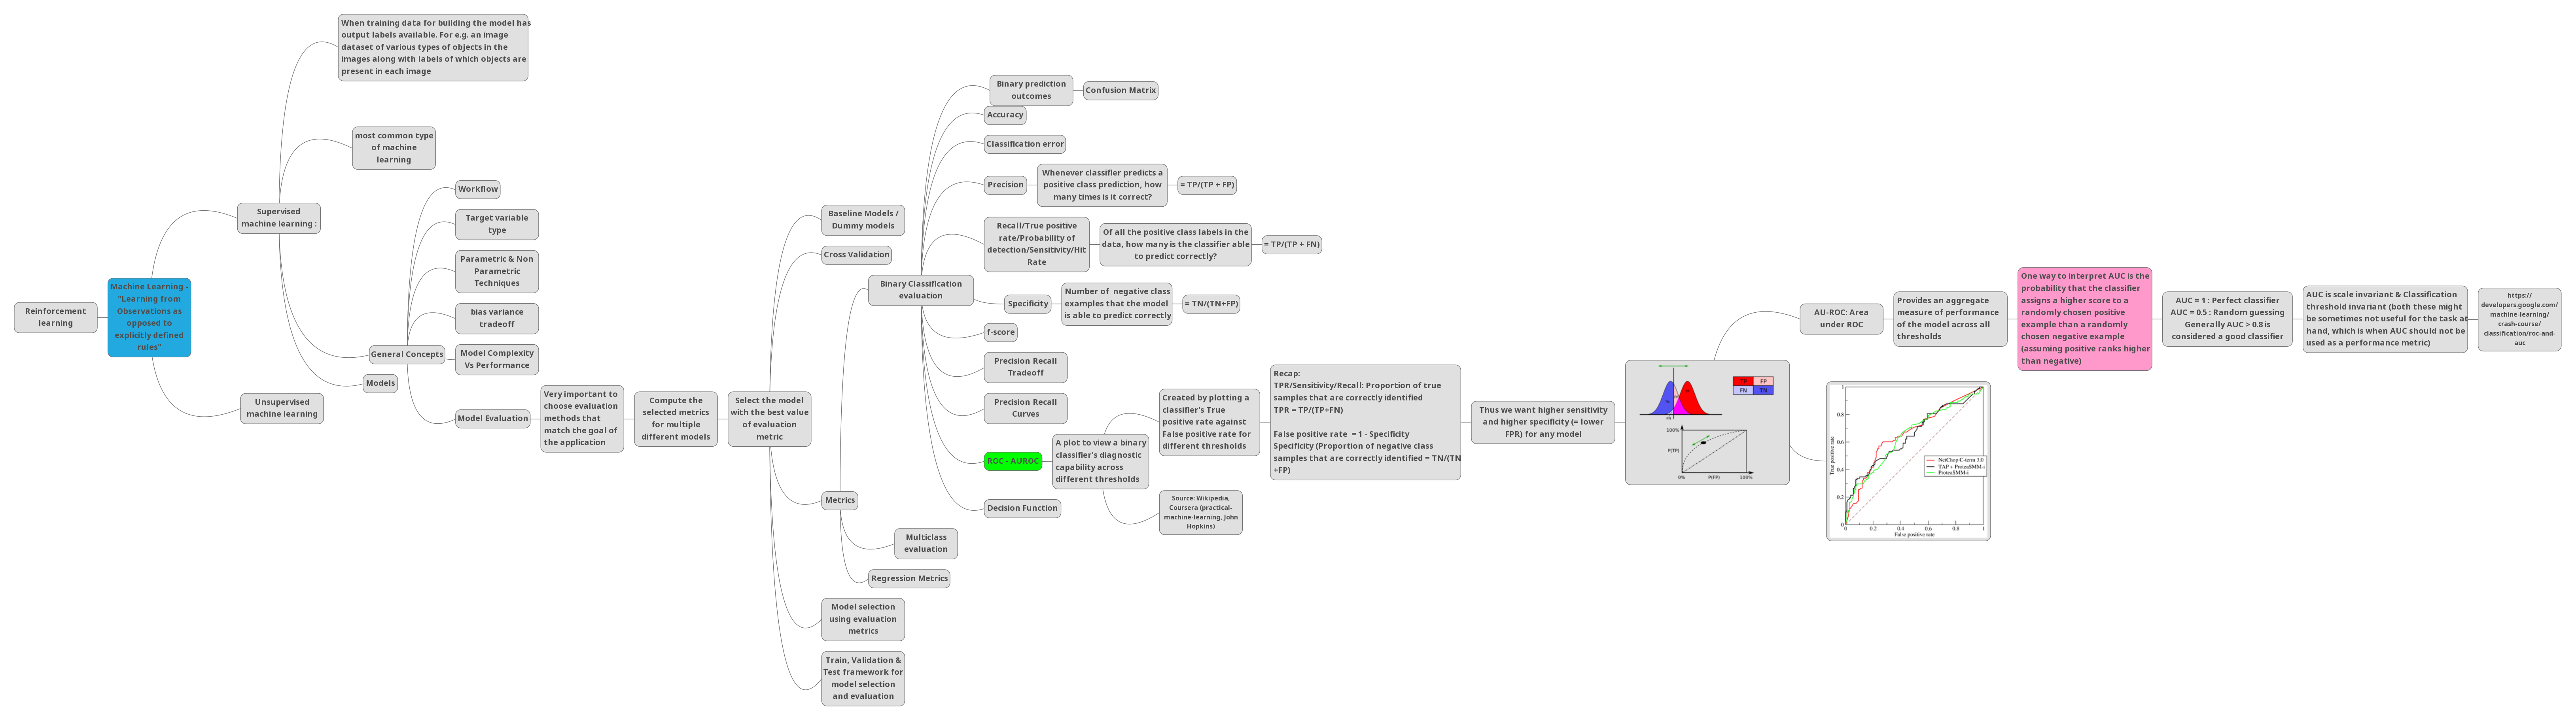

In [ ]:
fpr,tpr,_ = roc_curve(y_test,DecFnLogRegDigits)

Text(0.5, 1.0, 'Logistic Regression on imbalanced digits dataset. AUC = 0.99')

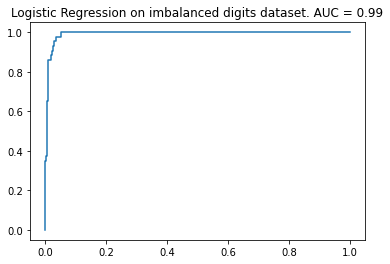

In [ ]:
plt.plot(fpr,tpr)
plt.title('Logistic Regression on imbalanced digits dataset. AUC = {:.2f}'.format(auc(fpr,tpr)))

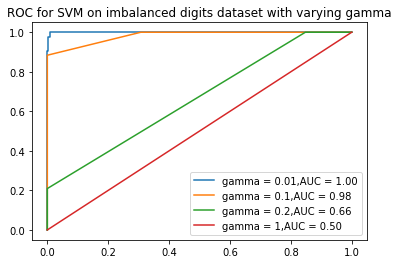

In [ ]:
plt.figure()
plt.title('ROC for SVM on imbalanced digits dataset with varying gamma')

for gamma_itn in [0.01,0.1,0.2,1]:
  model = SVC(gamma = gamma_itn).fit(X_train,y_train)
  dec_fn = model.decision_function(X_test)
  fpr,tpr,_ = roc_curve(y_test,dec_fn)
  plt.plot(fpr,
           tpr,
           label = 'gamma = {},AUC = {:.2f}'.format(gamma_itn,auc(fpr,tpr)))
  plt.legend()

### Multiclass classification

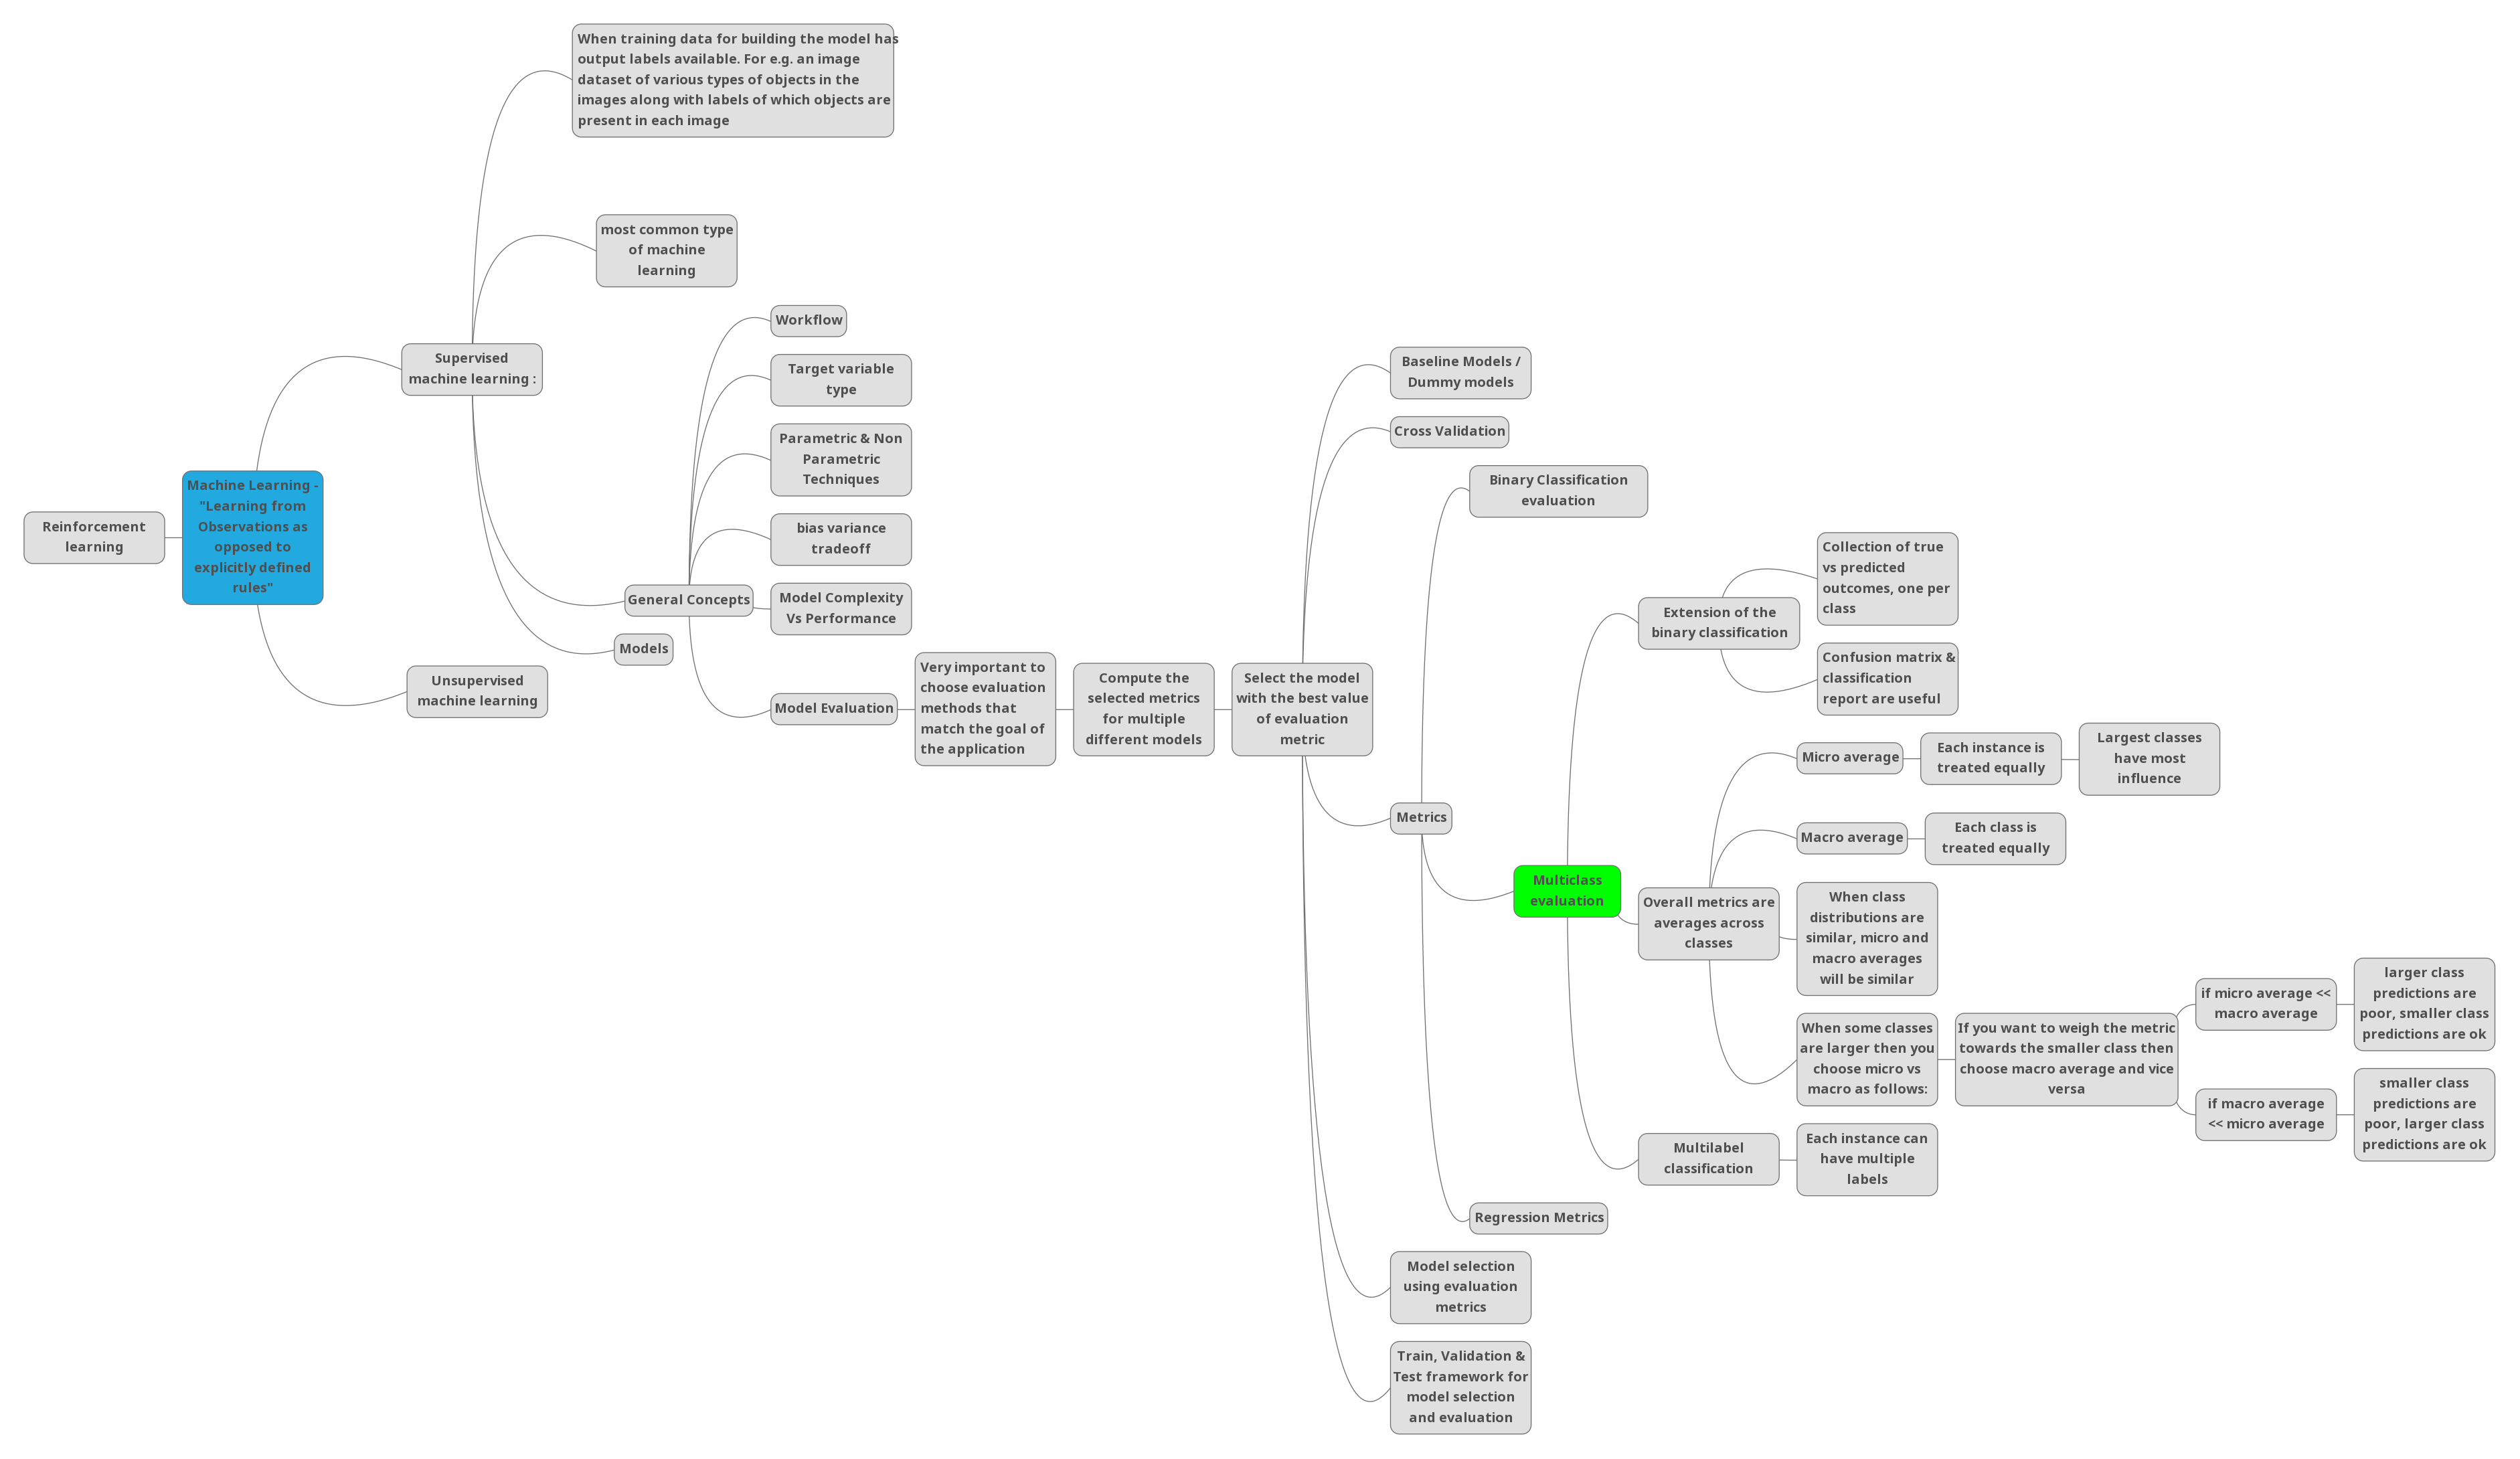

#### Confusion matrix

In [ ]:
X_train,X_test,y_train,y_test = train_test_split (X_digits,y_digits,random_state = 0)

In [ ]:
SVMLinDigits = SVC(kernel = 'linear').fit(X_train,y_train)

In [ ]:
confusion_matrix(y_test,SVMLinDigits.predict(X_test))

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 44]])

In [ ]:
SVMRBFDigits = SVC().fit(X_train,y_train)

In [ ]:
confusion_matrix(y_test,SVMRBFDigits.predict(X_test))

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 46]])

* As was observed in the sections above as well, SVM with RBF kernel is a near perfect classifier. 

#### Classification report

In [ ]:
print("Classification Report: SVM (RBF Kernel)")
print(classification_report(y_test,SVMRBFDigits.predict(X_test)))

Classification Report: SVM (RBF Kernel)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro Vs Macro Average metrics 

In [ ]:
print("Micro and macro precision: SVM RBF Kernel on Digits data")
print("Micro precision (treats samples equally) = {:.2f}".format(precision_score(y_test,SVMRBFDigits.predict(X_test),average='micro')))
print("Macro precision: (treats classes equally) = {:.2f}".format(precision_score(y_test,SVMRBFDigits.predict(X_test),average='macro')))

Micro and macro precision: SVM RBF Kernel on Digits data
Micro precision (treats samples equally) = 0.99
Macro precision: (treats classes equally) = 0.99


In [ ]:
print("Micro and macro f1-score: SVM Linear Kernel on Digits data")
print("Micro f1-score (treats samples equally) = {:.2f}".format(f1_score(y_test,SVMLinDigits.predict(X_test),average='micro')))
print("Macro f1-score (treats classes equally) = {:.2f}".format(f1_score(y_test,SVMLinDigits.predict(X_test),average='macro')))

Micro and macro f1-score: SVM Linear Kernel on Digits data
Micro f1-score (treats samples equally) = 0.97
Macro f1-score (treats classes equally) = 0.97


## Regression metrics

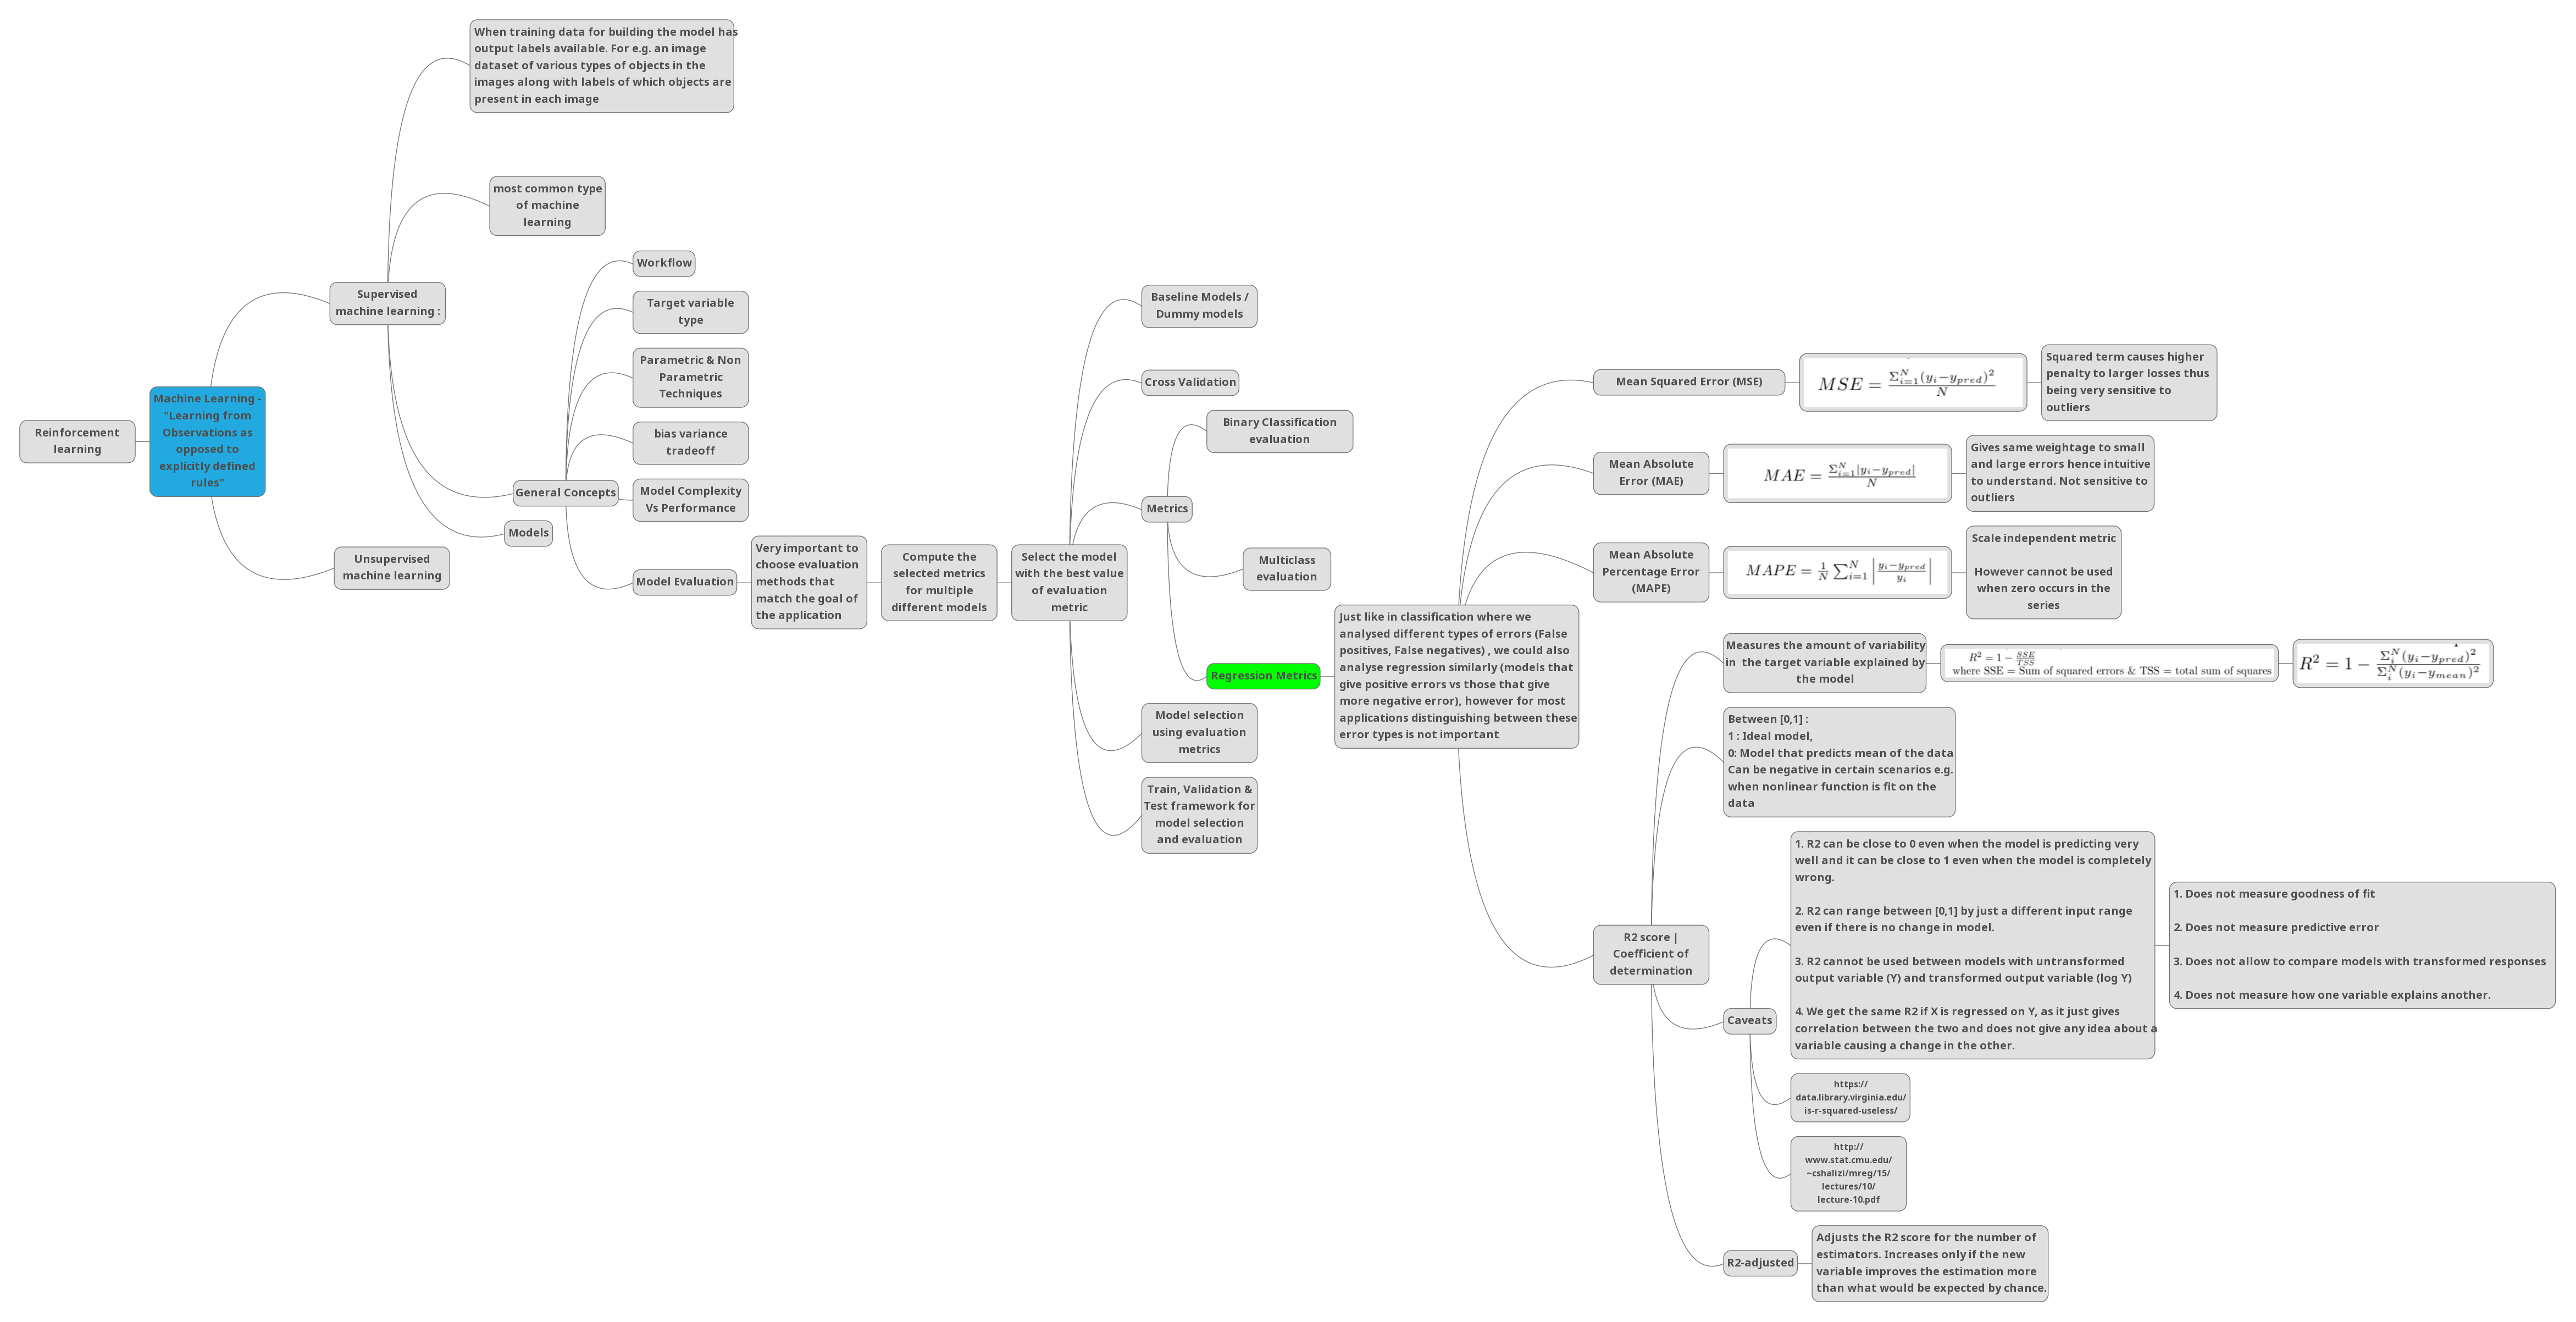

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

In [ ]:
Diabetes = load_diabetes()

In [ ]:
print(Diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
X_diabetes,y_diabetes = Diabetes.data,Diabetes.target

In [ ]:
X_diabetes

array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
       [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
       [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
       ...,
       [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
       [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
       [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]])

In [ ]:
X_diabetes = pd.DataFrame(X_diabetes,columns=Diabetes.feature_names)

In [ ]:
X_diabetes.head()

age       sex       bmi  ...        s4        s5        s6
0  0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1 -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2  0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3 -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4  0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641

[5 rows x 10 columns]

In [ ]:
y_diabetes = pd.Series(y_diabetes,name='DiseaseProgression')

In [ ]:
y_diabetes.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: DiseaseProgression, dtype: float64

In [ ]:
DiabetesData = pd.concat([X_diabetes,y_diabetes],axis=1)

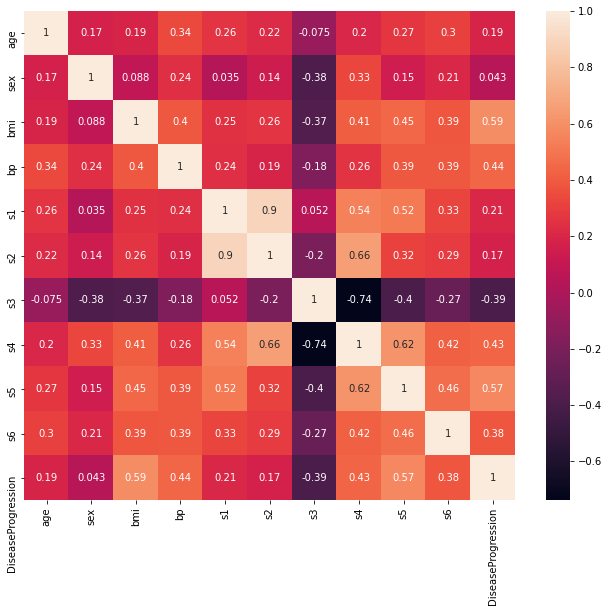

In [ ]:
plt.figure(figsize = (11,9))
sns.heatmap(DiabetesData.corr(),annot=True)

* All features except Gender are correlated to a certain extent to the output variable, hence we drop Gender from the model 

In [ ]:
X_diabetes.drop(['sex'],axis=1,inplace=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_diabetes,y_diabetes,random_state = 0)

In [ ]:
DiabetesLinRegModel = LinearRegression()

In [ ]:
DiabetesLinRegModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("R2 (train) score = {:.2f} ".format(DiabetesLinRegModel.score(X_train,y_train)))

R2 (train) score = 0.54 


In [ ]:
print("R2 (test) score = {:.2f} ".format(DiabetesLinRegModel.score(X_test,y_test)))

R2 (test) score = 0.32 


* Not a great R2 score but our point right now is to understand the eval metrics hence we will not do deeper in improving the model 

In [ ]:
print("MAE (train) score = {:.2f} ".format(mean_absolute_error(y_train,DiabetesLinRegModel.predict(X_train))))

MAE (train) score = 44.05 


In [ ]:
print("MAE (test) score = {:.2f} ".format(mean_absolute_error(y_test,DiabetesLinRegModel.predict(X_test))))

MAE (test) score = 46.16 


In [ ]:
print("MSE (train) score = {:.2f} ".format(mean_squared_error(y_train,DiabetesLinRegModel.predict(X_train))))

MSE (train) score = 2858.26 


In [ ]:
print("MSE (test) score = {:.2f} ".format(mean_squared_error(y_test,DiabetesLinRegModel.predict(X_test))))

MSE (test) score = 3351.32 


### Compare R2 of a dummy model

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
DiabetesDummyModel = DummyRegressor(strategy='mean')

In [ ]:
DiabetesDummyModel.fit(X_train,y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [ ]:
print("R2 (train) score = {:.2f} ".format(DiabetesDummyModel.score(X_train,y_train)))

R2 (train) score = 0.00 


In [ ]:
print("MAE (train) score = {:.2f} ".format(mean_absolute_error(y_train,DiabetesDummyModel.predict(X_train))))

MAE (train) score = 68.23 


In [ ]:
print("MAE (test) score = {:.2f} ".format(mean_absolute_error(y_test,DiabetesDummyModel.predict(X_test))))

MAE (test) score = 58.31 


In [ ]:
print("MSE (train) score = {:.2f} ".format(mean_squared_error(y_train,DiabetesDummyModel.predict(X_train))))

MSE (train) score = 6253.47 


In [ ]:
print("MSE (test) score = {:.2f} ".format(mean_squared_error(y_test,DiabetesDummyModel.predict(X_test))))

MSE (test) score = 4965.13 


* All metrics are much worse in the dummy model as expected than the linear regression model. Thus these metrics can be used to compare various models built on a given dataset. 

* Resources & Further reading 
1. [Regression Metrics for Machine Learning](https://machinelearningmastery.com/regression-metrics-for-machine-learning/)

2. [5 Regression Loss Functions All Machine Learners Should Know ](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)

3. [Is R-squared Useless? ](https://data.library.virginia.edu/is-r-squared-useless/)
